In [134]:
#  python version
import sys
print(sys.version)


3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]


In [135]:
!python --version

Python 3.10.12


In [133]:
tf.__version__

'2.15.0'

### models_scores

In [ ]:
# model_0 score
# {'mae': 566.1176,
#  'mse': 1149785.4,
#  'rmse': 1072.2804,
#  'mape': 2.52505,
#  'mase': 0.9945117698807909}

# model_1_score
# {'mae': 595.33673,
#  'mse': 1203572.8,
#  'rmse': 1097.0746,
#  'mape': 2.722598,
#  'mase': 1.039070613498857}

# model_3_score
# {'mae': 1204.9941,
#  'mse': 5075665.5,
#  'rmse': 2252.9238,
#  'mape': 5.4538283,
#  'mase': 2.1412769117962607}

# model_4_score CONV1D
# {'mae': 561.7786,
#  'mse': 1151999.0,
#  'rmse': 1073.3121,
#  'mape': 2.5123477,
#  'mase': 0.9868893479373553}

# model_5_score LSTM
# {'mae': 563.80945,
#  'mse': 1155648.8,
#  'rmse': 1075.011,
#  'mape': 2.5111594,
#  'mase': 0.990456954088914}

# model_6_score  Dense with extra reward column_or_1d
#  {'mae': 562.7824,
#  'mse': 1138221.6,
#  'rmse': 1066.8748,
#  'mape': 2.5114663,
#  'mase': 0.9877566}


# model_6_with extra layers and hidden Unit
# {'mae': 564.5647,
#  'mse': 1152898.5,
#  'rmse': 1073.7311,
#  'mape': 2.521431,
#  'mase': 1.1040499}

# model_8_ensemble_model_score
# {'mae': 566.55145,
#  'mse': 1138281.1,
#  'rmse': 1066.9026,
#  'mape': 2.5674744,
#  'mase': 0.9943718}

### strat template

In [1]:
!wget https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/helper.py
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from helper import plot_time_series
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as f:
  files = f.readlines()
from datetime import datetime
date = []
prices = []
files.pop(0)
for line in files:
  line.replace('\n','')
  items = line.split(',')
  date.append(datetime.strptime(items[1],'%Y-%m-%d'))
  prices.append(float(items[2]))
x = np.array(date)
y = np.array(prices)
split_size = int(.2*len(x))
x_train,x_test = x[:-split_size],x[-split_size:]
y_train,y_test = y[:-split_size],y[-split_size:]
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season
def evaluate_preds(y_true,y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(mape)
  return {'mae':mae.numpy(),'mse':mse.numpy(),'rmse':rmse.numpy(),'mape':mape.numpy(),'mase':mase.numpy()}
HORIZON = 1
WINDOW_SIZE = 7
def get_label_window(x,horizon=HORIZON):
  x = tf.expand_dims(x,axis=0)
  return tf.squeeze(x[:,0:-horizon]).numpy(),tf.squeeze(x[:,-horizon:]).numpy()
dict = {}
value = []
for i in range(0,len(prices)):
  if i>7 :
    dict[tuple(value)] = prices[i]
    value.pop(0)
    value.append(prices[i])

  else:
    value.append(prices[i])


windows = [list(i) for i in(dict.keys())]
horizons = list(dict.values())

df = pd.DataFrame({'window' : windows,
                    'horizon' : horizons})
split_size = int(.2*len(windows))

train_windows = windows[:-split_size]
train_horizons = horizons[:-split_size]

test_windows = windows[-split_size:]
test_horizons = horizons[-split_size:]
import os
checkpoint_path = 'BTC_model_checkpoints/checkpoint.ckpt'
def create_model_checkpoint(model_name,save_path=checkpoint_path):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                                         save_weights_only=True,
                                                         monitor='val_loss',
                                                         save_best_only=True,
                                                         verbose=0)

--2024-07-15 14:13:21--  https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11740 (11K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  11.46K  --.-KB/s    in 0s      

2024-07-15 14:13:21 (79.7 MB/s) - ‘helper.py’ saved [11740/11740]

--2024-07-15 14:13:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

### fuction to create windows and horizons

In [2]:
import numpy as np

def create_window_horizon(prices, window_size, horizon):
    """
    Creates windows and horizons for time series forecasting.

    Parameters:
    prices (list or np.array): The sequence of prices.
    window_size (int): The size of each window.
    horizon (int): The forecast horizon (number of future steps to predict).

    Returns:
    train_windows (np.array): Training windows.
    train_horizons (np.array): Training horizons.
    test_windows (np.array): Testing windows.
    test_horizons (np.array): Testing horizons.
    """
    windows = []
    horizons = []

    # Create windows and horizons
    for i in range(len(prices) - window_size - horizon + 1):
        window = prices[i:i + window_size]
        horizon_value = prices[i + window_size:i + window_size + horizon]
        windows.append(window)
        horizons.append(horizon_value)

    windows = np.array(windows)
    horizons = np.array(horizons)

    # Split data into training and testing sets
    split_size = int(0.2 * len(windows))

    train_windows = windows[:-split_size]
    train_horizons = horizons[:-split_size]
    test_windows = windows[-split_size:]
    test_horizons = horizons[-split_size:]

    return train_windows, train_horizons, test_windows, test_horizons





In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-07-08 10:55:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-07-08 10:55:43 (5.23 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
!wget https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/helper.py

--2024-07-08 17:00:15--  https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11740 (11K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]  11.46K  --.-KB/s    in 0s      

2024-07-08 17:00:15 (78.4 MB/s) - ‘helper.py.1’ saved [11740/11740]



### read our timeseries data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
for col in df.columns:
  print(f'col_name: {col}')
  print('number unique: ',df[col].nunique())
  print('type: ' ,df[col].dtype)
  print('\n|||||||||||||||||||||')

col_name: Currency
number unique:  1
type:  object

|||||||||||||||||||||
col_name: Closing Price (USD)
number unique:  2787
type:  float64

|||||||||||||||||||||
col_name: 24h Open (USD)
number unique:  2787
type:  float64

|||||||||||||||||||||
col_name: 24h High (USD)
number unique:  2787
type:  float64

|||||||||||||||||||||
col_name: 24h Low (USD)
number unique:  2785
type:  float64

|||||||||||||||||||||


In [ ]:
_ = ['high school','master','phd','undergraduated','graduated']
for i in _:
  print('the length of the list is',len(_))
  print(f'the value is :{i} || and the len of word is {len(i)}')
print(_[_.index('undergraduated')])
_.insert(4,'graduated')
print(_)
_.insert(10,'high school')
print(_)
_[1] = 'phd'
print(_)
_.remove('high school')
print(_)


the length of the list is 5
the value is :high school || and the len of word is 11
the length of the list is 5
the value is :master || and the len of word is 6
the length of the list is 5
the value is :phd || and the len of word is 3
the length of the list is 5
the value is :undergraduated || and the len of word is 14
the length of the list is 5
the value is :graduated || and the len of word is 9
undergraduated
['high school', 'master', 'phd', 'undergraduated', 'graduated', 'graduated']
['high school', 'master', 'phd', 'undergraduated', 'graduated', 'graduated', 'high school']
['high school', 'phd', 'phd', 'undergraduated', 'graduated', 'graduated', 'high school']
['phd', 'phd', 'undergraduated', 'graduated', 'graduated', 'high school']


In [ ]:
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as f:
  files = f.readlines()
files

['Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)\n',
 'BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349\n',
 'BTC,2013-10-02,125.455,123.65499,125.7585,123.63383\n',
 'BTC,2013-10-03,108.58483,125.455,125.66566,83.32833\n',
 'BTC,2013-10-04,118.67466,108.58483,118.675,107.05816\n',
 'BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566\n',
 'BTC,2013-10-06,120.65533,121.33866,121.85216,120.5545\n',
 'BTC,2013-10-07,121.795,120.65533,121.99166,120.43199\n',
 'BTC,2013-10-08,123.033,121.795,123.64016,121.35066\n',
 'BTC,2013-10-09,124.049,123.033,124.7835,122.59266\n',
 'BTC,2013-10-10,125.96116,124.049,128.01683,123.81966\n',
 'BTC,2013-10-11,125.27966,125.96116,126.43666,124.11383\n',
 'BTC,2013-10-12,125.9275,125.27966,126.0365,123.12966\n',
 'BTC,2013-10-13,126.38333,125.9275,126.8965,125.2765\n',
 'BTC,2013-10-14,135.24199,126.38333,135.24199,126.255\n',
 'BTC,2013-10-15,133.20333,135.24199,135.69216,130.39275\n',
 'BTC,2013-10-16,142.76333,133

In [ ]:
from datetime import datetime
date = []
prices = []
files.pop(0)
for line in files:
  line.replace('\n','')
  items = line.split(',')
  date.append(datetime.strptime(items[1],'%Y-%m-%d'))
  prices.append(float(items[2]))

In [ ]:
len(date)

2787

In [ ]:
prices[:5]

['123.65499', '125.455', '108.58483', '118.67466', '121.33866']

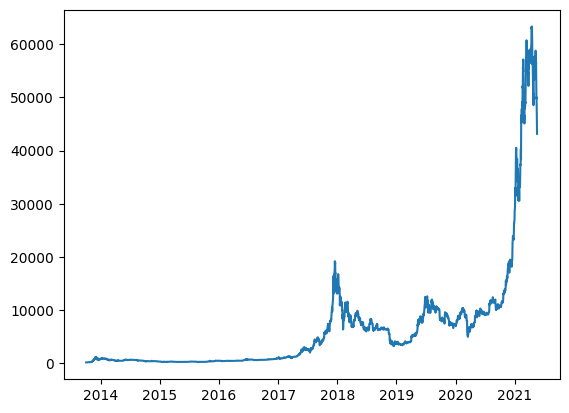

In [ ]:
plt.plot(date,prices)
plt

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(date)
y = np.array(prices)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


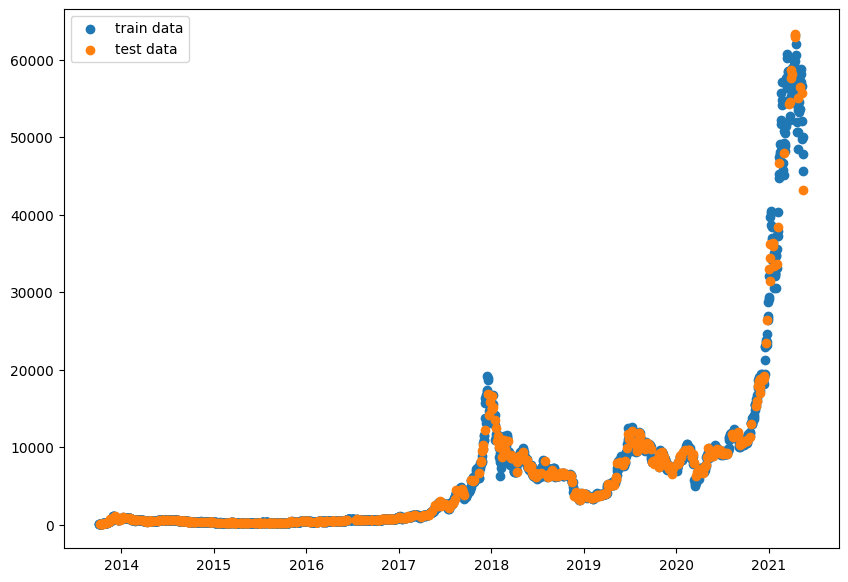

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,label='train data')
plt.scatter(x_test,y_test,label='test data')
plt.legend()
#

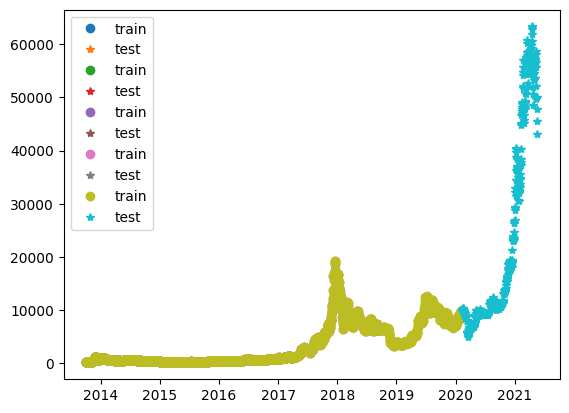

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
# visualize
fig, ax = plt.subplots()
for train_index, test_index in tscv.split(x):
  ax.plot(x[train_index], y[train_index], 'o', label='train')
  ax.plot(x[test_index], y[test_index], '*', label='test')
  ax.legend()

In [ ]:
split_size = int(.2*len(x))
x_train,x_test = x[:-split_size],x[-split_size:]
y_train,y_test = y[:-split_size],y[-split_size:]
len(x_train),len(x_test),len(y_train),len(y_test)

(2228, 556, 2228, 556)

In [ ]:
x_train[:5]

array([datetime.datetime(2013, 10, 4, 0, 0),
       datetime.datetime(2013, 10, 5, 0, 0),
       datetime.datetime(2013, 10, 6, 0, 0),
       datetime.datetime(2013, 10, 7, 0, 0),
       datetime.datetime(2013, 10, 8, 0, 0)], dtype=object)

In [ ]:
x_test[:5]

array([datetime.datetime(2019, 11, 10, 0, 0),
       datetime.datetime(2019, 11, 11, 0, 0),
       datetime.datetime(2019, 11, 12, 0, 0),
       datetime.datetime(2019, 11, 13, 0, 0),
       datetime.datetime(2019, 11, 14, 0, 0)], dtype=object)

In [ ]:
y_train[:5]

array([118.67466, 121.33866, 120.65533, 121.795  , 123.033  ])

In [ ]:
y_test[:5]

array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
       8749.52059102])

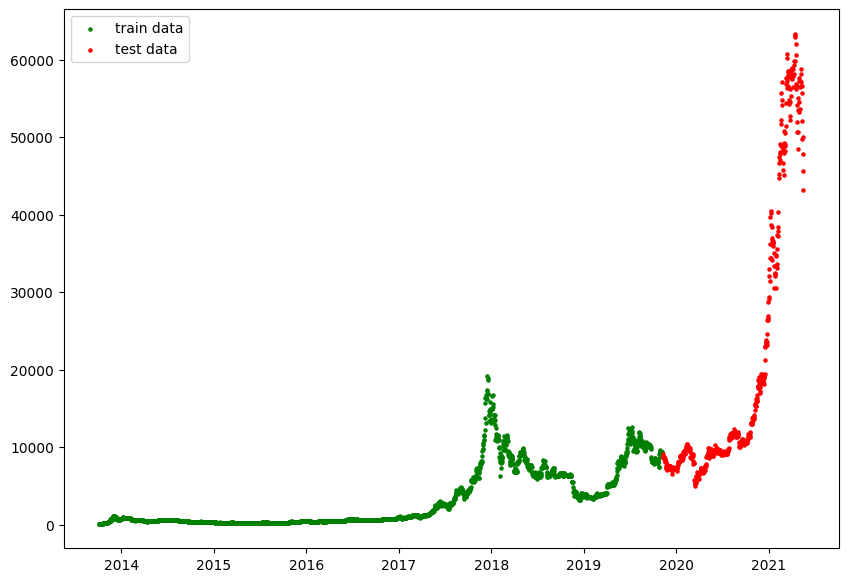

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,label='train data',s=5,c='green')
plt.scatter(x_test,y_test,label='test data',s=5,c='red')
plt.legend()

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season


In [ ]:
def evaluate_preds(y_true,y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(mape)
  return {'mae':mae.numpy(),'mse':mse.numpy(),'rmse':rmse.numpy(),'mape':mape.numpy(),'mase':mase.numpy()}

In [ ]:
mean_absolute_scaled_error(y_test[1:],y_test[:-1])

<tf.Tensor: shape=(), dtype=float64, numpy=0.9982130768537103>

In [ ]:
evaluate_preds(y_test[1:],y_test[:-1])

{'mae': 568.224567365514,
 'mse': 1149275.2063700752,
 'rmse': 1072.0425394405183,
 'mape': 2.512213489068689,
 'mase': 0.9982130768537103}

# create our data windows and horizons

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
def get_label_window(x,horizon=HORIZON):
  x = tf.expand_dims(x,axis=0)
  return tf.squeeze(x[:,0:-horizon]).numpy(),tf.squeeze(x[:,-horizon:]).numpy()

In [ ]:
dict = {}
value = []
for i in range(0,len(prices)):
  if i>=7 :
    dict[tuple(value)] = prices[i]
    value.pop(0)
    value.append(prices[i])

  else:
    value.append(prices[i])

In [ ]:

windows = [list(i) for i in(dict.keys())]
horizons = list(dict.values())

df = pd.DataFrame({'window' : windows,
                    'horizon' : horizons})

In [ ]:
pd.set_option('display.max_colwidth', None)
df

,window,horizon
0,"[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]",123.033000
1,"[125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033]",124.049000
2,"[108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049]",125.961160
3,"[118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116]",125.279660
4,"[121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116, 125.27966]",125.927500
...,...,...
2775,"[56583.8498791665, 57107.1206718864, 58788.2096789273, 58102.1914262342, 55715.5466512869, 56573.5554719043, 52147.8211869823]",49764.132082
2776,"[57107.1206718864, 58788.2096789273, 58102.1914262342, 55715.5466512869, 56573.5554719043, 52147.8211869823, 49764.1320815975]",50032.693137
2777,"[58788.2096789273, 58102.1914262342, 55715.5466512869, 56573.5554719043, 52147.8211869823, 49764.1320815975, 50032.6931367648]",47885.625255
2778,"[58102.1914262342, 55715.5466512869, 56573.5554719043, 52147.8211869823, 49764.1320815975, 50032.6931367648, 47885.6252547166]",45604.615754


# split windows and horizons data into train and test

In [ ]:

#  create train test data
split_size = int(.2*len(windows))

train_windows = windows[:-split_size]
train_horizons = horizons[:-split_size]

test_windows = windows[-split_size:]
test_horizons = horizons[-split_size:]

In [ ]:
train_windows[:2],train_horizons[:2],test_windows[:2],test_horizons[:2]

([[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
  [125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033]],
 [123.033, 124.049],
 [[9290.8966023936,
   9202.41545055,
   9369.6280811552,
   9326.5996237841,
   9335.7524023305,
   9226.4858208826,
   8794.3586445233],
  [9202.41545055,
   9369.6280811552,
   9326.5996237841,
   9335.7524023305,
   9226.4858208826,
   8794.3586445233,
   8798.0420546256]],
 [8798.0420546256, 9081.1868784913])

In [ ]:
len(train_windows),len(train_horizons),len(test_windows),len(test_horizons)

(2224, 2224, 556, 556)

In [ ]:
len(windows),len(horizons)

(2780, 2780)

In [ ]:
# create model checkpoint callpacks
import os
checkpoint_path = 'BTC_model_checkpoints/checkpoint.ckpt'
def create_model_checkpoint(model_name,save_path=checkpoint_path):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                                         save_weights_only=True,
                                                         monitor='val_loss',
                                                         save_best_only=True,
                                                         verbose=1)

# model_0 window_size [7] and horizon_size [1]

In [ ]:
# creat our first model (Dense model)

tf.random.set_seed(42)
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name='model_0')
model_0.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_0.fit(train_windows,
            train_horizons,
            epochs=100,
            validation_data=(test_windows,test_horizons),
            callbacks=[create_model_checkpoint(model_name='model_0')])

Epoch 1/100
35/70 [==============>...............] - ETA: 0s - loss: 843.0367 - mae: 843.0367 - mse: 3358853.5000    
Epoch 1: val_loss improved from inf to 1036.13916, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_0
70/70 [==============================] - 1s 6ms/step - loss: 518.2291 - mae: 518.2291 - mse: 1775221.5000 - val_loss: 1036.1392 - val_mae: 1036.1392 - val_mse: 3140126.5000
Epoch 2/100
36/70 [==============>...............] - ETA: 0s - loss: 165.3647 - mae: 165.3647 - mse: 147540.0469
Epoch 2: val_loss improved from 1036.13916 to 1027.39856, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_0
70/70 [==============================] - 0s 3ms/step - loss: 165.6606 - mae: 165.6606 - mse: 143481.0312 - val_loss: 1027.3986 - val_mae: 1027.3986 - val_mse: 2912385.7500
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 160.8412 - mae: 160.8412 - mse: 134613.9062
Epoch 3: val_loss improved from 1027.39856 to 831.72253, saving model to BTC_m

In [ ]:
model_0.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1024      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_0.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 570.9579 - mae: 570.9579 - mse: 1161328.3750


[570.9578857421875, 570.9578857421875, 1161328.375]

In [ ]:
# load best_weights
model_0.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_0')

In [ ]:
# evaluate our model with new weights
model_0.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 566.1176 - mae: 566.1176 - mse: 1149785.3750


[566.1175537109375, 566.1175537109375, 1149785.375]

In [ ]:
model_0_preds = model_0.predict(test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_0_preds = tf.squeeze(model_0_preds).numpy()

In [ ]:
len(test_horizons)

556

In [ ]:
len(list(model_0_preds))

556

In [ ]:
model_0_score = evaluate_preds(np.array(test_horizons),np.array(model_0_preds))
model_0_score

{'mae': 566.1176,
 'mse': 1149785.4,
 'rmse': 1072.2804,
 'mape': 2.52505,
 'mase': 0.9945117698807909}

# visualize model_0

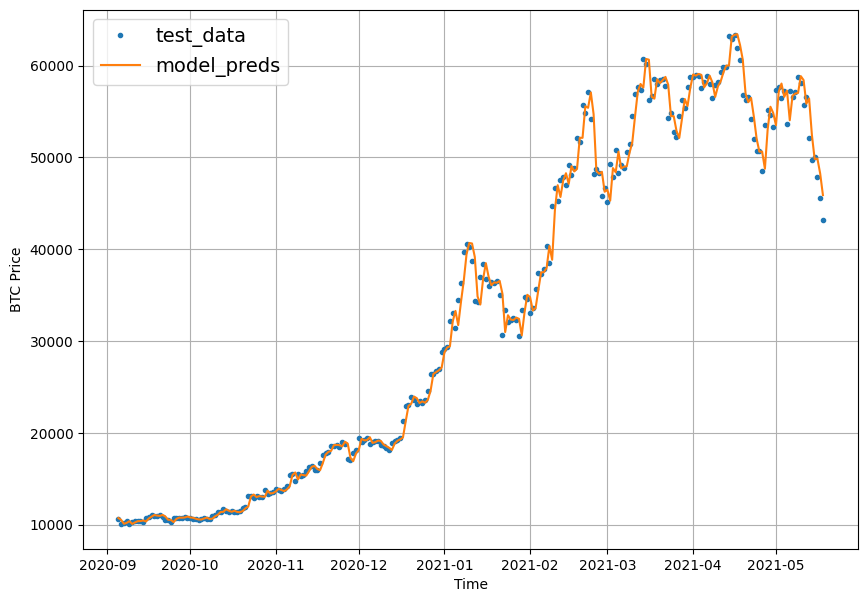

In [ ]:
from helper import plot_time_series

plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):],
                 test_horizons,
                 start=300,
                 label='test_data')
plot_time_series(x_test[-len(test_windows):],
                 model_0_preds,
                 format='-',
                 start=300,
                 label='model_preds')

# model_1 window_size [30] and horizon_size [1]

In [ ]:
prices[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
train_windows,train_horizons,test_windows,test_horizons = create_window_horizon(30,1)


In [ ]:
prices[:35]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075]

In [ ]:
train_windows[:1],train_horizons[:1],test_windows[:1],test_horizons[:1]

([[123.65499,
   125.455,
   108.58483,
   118.67466,
   121.33866,
   120.65533,
   121.795,
   123.033,
   124.049,
   125.96116,
   125.27966,
   125.9275,
   126.38333,
   135.24199,
   133.20333,
   142.76333,
   137.92333,
   142.95166,
   152.55183,
   160.33883,
   164.31499,
   177.63333,
   188.29716,
   200.70166,
   180.355,
   175.03166,
   177.6965,
   187.15983,
   192.75666,
   197.4]],
 [196.02499],
 [[8162.44,
   8003.8203947876,
   8058.0580811125,
   7970.2394756046,
   7943.3471070605,
   8200.3187633988,
   8200.2460994923,
   8073.4095438836,
   7420.4158364928,
   7460.6174159279,
   8591.2238974163,
   9171.3065318558,
   9578.3675560737,
   9458.2233596272,
   9455.7246926058,
   9225.9954793378,
   9131.4106303055,
   9197.6323446207,
   9290.8966023936,
   9202.41545055,
   9369.6280811552,
   9326.5996237841,
   9335.7524023305,
   9226.4858208826,
   8794.3586445233,
   8798.0420546256,
   9081.1868784913,
   8711.5343391679,
   8760.8927181435,
   8749.52

In [ ]:
len(train_windows),len(train_horizons),len(test_windows),len(test_horizons)

(2206, 2206, 551, 551)

In [ ]:
2206+551

2757

In [ ]:
# checkpoint_path = 'BTC_model_checkpoints/checkpoint.ckpt'
def create_model_checkpoint(model_name,save_path=checkpoint_path):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                                         save_weights_only=True,
                                                         monitor='val_loss',
                                                         save_best_only=True,
                                                         verbose=2)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
],name='model_1')

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_1.fit(train_windows,
            train_horizons,
            epochs=100,
            validation_data=(test_windows,test_horizons),
            callbacks=[create_model_checkpoint(model_name='model_1')])

Epoch 1/100
50/69 [====================>.........] - ETA: 0s - loss: 625.3361 - mae: 625.3361 - mse: 2124666.0000
Epoch 1: val_loss improved from inf to 1515.07581, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_1
69/69 [==============================] - 1s 7ms/step - loss: 528.8091 - mae: 528.8091 - mse: 1622315.8750 - val_loss: 1515.0758 - val_mae: 1515.0758 - val_mse: 6916082.0000
Epoch 2/100
44/69 [==================>...........] - ETA: 0s - loss: 236.0925 - mae: 236.0925 - mse: 261524.9062
Epoch 2: val_loss improved from 1515.07581 to 1286.37329, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_1
69/69 [==============================] - 0s 4ms/step - loss: 233.2330 - mae: 233.2330 - mse: 253728.4688 - val_loss: 1286.3733 - val_mae: 1286.3733 - val_mse: 5223686.0000
Epoch 3/100
44/69 [==================>...........] - ETA: 0s - loss: 192.8125 - mae: 192.8125 - mse: 191718.2031
Epoch 3: val_loss improved from 1286.37329 to 952.40076, saving model to BTC_model

In [ ]:
model_1.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 5ms/step - loss: 616.4544 - mae: 616.4544 - mse: 1278147.2500


[616.4544067382812, 616.4544067382812, 1278147.25]

In [ ]:
model_1.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_1')

In [ ]:
model_1.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 595.3368 - mae: 595.3368 - mse: 1203572.8750


[595.3367919921875, 595.3367919921875, 1203572.875]

In [ ]:
model_1_preds = model_1.predict(test_windows)
model_1_preds = tf.squeeze(model_1_preds).numpy()
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


array([8928.66  , 8793.96  , 8679.394 , 8510.271 , 8502.552 , 8277.137 ,
       8235.57  , 8279.156 , 7779.354 , 7382.1426], dtype=float32)

In [ ]:
model_1_score = evaluate_preds(test_horizons,model_1_preds)
model_1_score

{'mae': 595.33673,
 'mse': 1203572.8,
 'rmse': 1097.0746,
 'mape': 2.722598,
 'mase': 1.039070613498857}

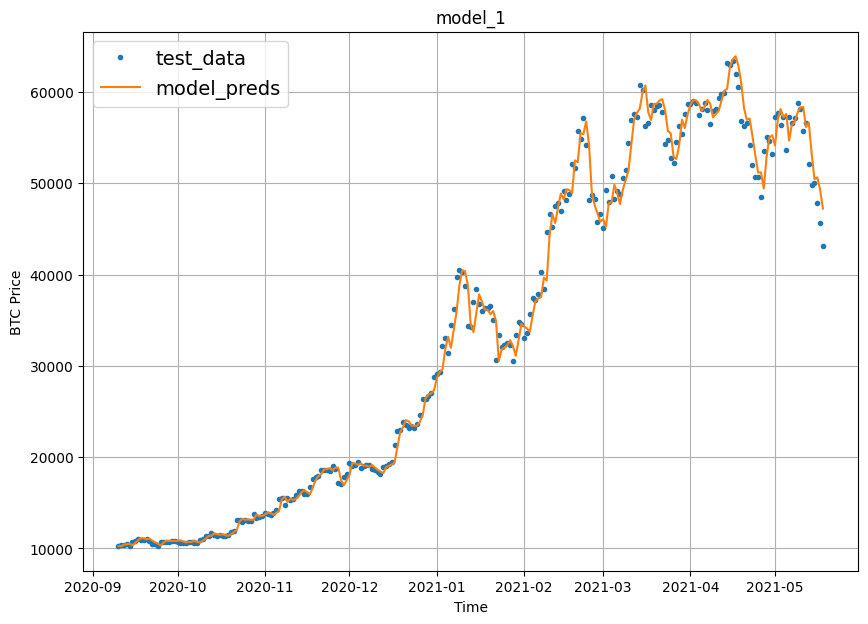

In [ ]:
# visualize model_1
plt.figure(figsize=(10,7))
plt.title('model_1')
plot_time_series(x_test[-len(test_windows):],
                 test_horizons,
                 start=300,
                 label='test_data')
plot_time_series(x_test[-len(test_windows):],
                 model_1_preds,
                 format='-',
                 start=300,
                 label='model_preds')

# model_3 window_size [30] and horizon_size [7]

In [ ]:
import numpy as np

def create_window_horizon(prices, window_size, horizon):
    """
    Creates windows and horizons for time series forecasting.

    Parameters:
    prices (list or np.array): The sequence of prices.
    window_size (int): The size of each window.
    horizon (int): The forecast horizon (number of future steps to predict).

    Returns:
    train_windows (np.array): Training windows.
    train_horizons (np.array): Training horizons.
    test_windows (np.array): Testing windows.
    test_horizons (np.array): Testing horizons.
    """
    windows = []
    horizons = []

    # Create windows and horizons
    for i in range(len(prices) - window_size - horizon + 1):
        window = prices[i:i + window_size]
        horizon_value = prices[i + window_size:i + window_size + horizon]
        windows.append(window)
        horizons.append(horizon_value)

    windows = np.array(windows)
    horizons = np.array(horizons)

    # Split data into training and testing sets
    split_size = int(0.2 * len(windows))

    train_windows = windows[:-split_size]
    train_horizons = horizons[:-split_size]
    test_windows = windows[-split_size:]
    test_horizons = horizons[-split_size:]

    return train_windows, train_horizons, test_windows, test_horizons





In [ ]:
window_size = 30
horizon = 7

train_windows, train_horizons, test_windows, test_horizons = create_window_horizon(prices, window_size, horizon)
print(f"Train windows: {train_windows.shape}, Train horizons: {train_horizons.shape}")
print(f"Test windows: {test_windows.shape}, Test horizons: {test_horizons.shape}")

Train windows: (2201, 30), Train horizons: (2201, 7)
Test windows: (550, 30), Test horizons: (550, 7)


In [ ]:
prices[:40]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325]

In [ ]:
train_windows[:1],train_horizons[:1],test_windows[:1],test_horizons[:1]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333]]),
 array([[8582.1445177 , 8320.1715814 , 8328.60426039, 8282.17732583,
         8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
         7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
         8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
         9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
         9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
         9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452]]),

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(7,activation='linear')])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_3.fit(train_windows,
            train_horizons,
            epochs=100,
            validation_data=(test_windows,test_horizons),
            callbacks=[create_model_checkpoint(model_name='model_3')])

Epoch 1/100
57/69 [=======================>......] - ETA: 0s - loss: 950.8883 - mae: 950.8883 - mse: 6507245.5000  
Epoch 1: val_loss improved from inf to 2086.05249, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_3
69/69 [==============================] - 2s 11ms/step - loss: 848.8912 - mae: 848.8912 - mse: 5491694.0000 - val_loss: 2086.0525 - val_mae: 2086.0525 - val_mse: 12981770.0000
Epoch 2/100
54/69 [======================>.......] - ETA: 0s - loss: 373.4322 - mae: 373.4322 - mse: 676266.7500
Epoch 2: val_loss improved from 2086.05249 to 1770.20251, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_3
69/69 [==============================] - 0s 4ms/step - loss: 361.6256 - mae: 361.6256 - mse: 640525.5000 - val_loss: 1770.2025 - val_mae: 1770.2025 - val_mse: 9634089.0000
Epoch 3/100
53/69 [======================>.......] - ETA: 0s - loss: 334.3328 - mae: 334.3328 - mse: 518327.8125
Epoch 3: val_loss improved from 1770.20251 to 1594.29211, saving model to BTC_

In [ ]:
model_3.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 1316.9160 - mae: 1316.9160 - mse: 5591553.5000


[1316.916015625, 1316.916015625, 5591553.5]

In [ ]:
model_3.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_3')

In [ ]:
model_3.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 6ms/step - loss: 1204.9941 - mae: 1204.9941 - mse: 5075665.0000


[1204.994140625, 1204.994140625, 5075665.0]

In [ ]:
model_3_preds = model_3.predict(test_windows)
model_3_preds = tf.squeeze(model_3_preds).numpy()
model_3_preds[:10]

18/18 [==============================] - 0s 7ms/step


array([[8869.09  , 8885.685 , 8780.191 , 8902.057 , 9215.64  , 9110.839 ,
        9087.877 ],
       [8824.054 , 8759.945 , 8726.807 , 8786.363 , 9025.084 , 9085.352 ,
        9031.439 ],
       [9021.643 , 9008.553 , 9118.484 , 9094.969 , 9335.066 , 9434.787 ,
        9234.761 ],
       [8847.173 , 8888.602 , 8948.541 , 9091.944 , 9191.885 , 9223.889 ,
        8967.977 ],
       [8883.859 , 8867.8955, 8911.225 , 8944.271 , 9152.379 , 9082.145 ,
        8963.793 ],
       [8820.003 , 8831.639 , 8950.736 , 8854.855 , 9076.428 , 9007.017 ,
        8916.629 ],
       [8738.583 , 8713.064 , 8745.304 , 8667.784 , 8850.498 , 8805.336 ,
        8578.628 ],
       [8599.228 , 8557.272 , 8503.536 , 8576.831 , 8643.306 , 8619.552 ,
        8439.592 ],
       [8502.191 , 8334.458 , 8346.244 , 8446.466 , 8497.502 , 8459.087 ,
        8435.346 ],
       [8477.107 , 8332.39  , 8380.326 , 8458.855 , 8489.706 , 8490.403 ,
        8602.579 ]], dtype=float32)

In [ ]:
test_horizons.shape

(550, 7)

In [ ]:
model_3_preds.shape

(550, 7)

In [ ]:
model_3_score = evaluate_preds(test_horizons,model_3_preds)
model_3_score

{'mae': 1204.9941,
 'mse': 5075665.5,
 'rmse': 2252.9238,
 'mape': 5.4538283,
 'mase': 2.1412769117962607}

In [ ]:
len(test_horizons),len(model_3_preds),len(test_windows),len(train_windows),len(train_horizons),len(x_test)

(550, 550, 550, 2201, 2201, 557)

In [ ]:
x_test[:5]

array([datetime.datetime(2019, 11, 9, 0, 0),
       datetime.datetime(2019, 11, 10, 0, 0),
       datetime.datetime(2019, 11, 11, 0, 0),
       datetime.datetime(2019, 11, 12, 0, 0),
       datetime.datetime(2019, 11, 13, 0, 0)], dtype=object)

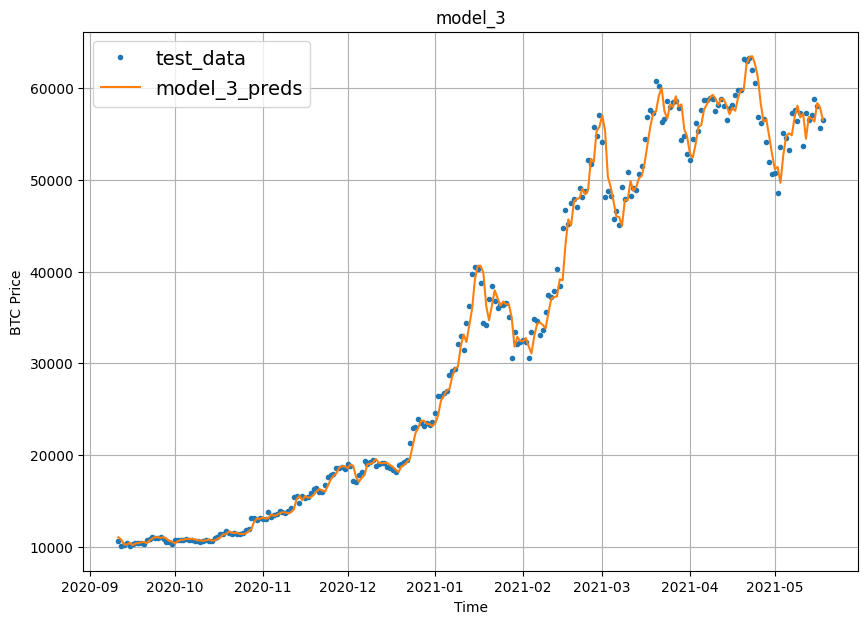

In [ ]:
# visualize our model score
# visualize model_3
plt.figure(figsize=(10,7))
plt.title('model_3')
plot_time_series(x_test[-len(test_windows):],
                 test_horizons[:,0],
                 start=300,
                 label='test_data')
plot_time_series(x_test[-len(test_windows):],
                 model_3_preds[:,0],
                 format='-',
                 start=300,
                 label='model_3_preds')

# model_4 conv1D
* window_size = 7
* horizon = 1

In [126]:
train_windows,train_horizons,test_windows,test_horizons = create_window_horizon(prices,7,1)

In [127]:
import pickle

# Save train_windows and train_horizons
with open('train_data.pkl', 'wb') as f:
    pickle.dump((train_windows, train_horizons), f)

# Save test_windows and test_horizons
with open('test_data.pkl', 'wb') as f:
    pickle.dump((test_windows, test_horizons), f)


In [111]:

# test case for this expand_dim_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))
y = [5,6,7,8]
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(y)
x,type(x)

(<tf.Tensor: shape=(4, 1), dtype=int32, numpy=
 array([[5],
        [6],
        [7],
        [8]], dtype=int32)>,
 tensorflow.python.framework.ops.EagerTensor)

In [112]:
model_4  = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.Conv1D(filters=128,kernel_size=7,activation='relu',padding='causal'),
    tf.keras.layers.Dense(1)

])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_4.fit(train_windows,
            train_horizons,
            epochs=100,
            validation_data=(test_windows,test_horizons),
            callbacks=[create_model_checkpoint(model_name='model_4')])

Epoch 1/100
70/70 [==============================] - 2s 10ms/step - loss: 701.5492 - mae: 701.5492 - mse: 3213800.7500 - val_loss: 1061.9708 - val_mae: 1061.9708 - val_mse: 3748312.2500
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 191.8112 - mae: 191.8112 - mse: 191229.5312 - val_loss: 1028.8632 - val_mae: 1028.8632 - val_mse: 3428918.7500
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 178.2662 - mae: 178.2662 - mse: 168121.6719 - val_loss: 1007.1821 - val_mae: 1007.1821 - val_mse: 3165517.2500
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 173.5001 - mae: 173.5001 - mse: 155276.4219 - val_loss: 918.2101 - val_mae: 918.2101 - val_mse: 2858547.5000
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 165.0722 - mae: 165.0722 - mse: 144018.4531 - val_loss: 861.5971 - val_mae: 861.5971 - val_mse: 2521453.2500
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 153.6168 

In [113]:
model_4.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 659.8557 - mae: 659.8557 - mse: 1374891.2500


[659.855712890625, 659.855712890625, 1374891.25]

In [114]:
model_4.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_4')

In [115]:
model_4.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 2ms/step - loss: 563.5685 - mae: 563.5685 - mse: 1153880.1250


[563.5684814453125, 563.5684814453125, 1153880.125]

In [116]:
model_4_preds = model_4.predict(test_windows)
model_4_preds = tf.squeeze(model_4_preds).numpy()
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


array([8851.49  , 8790.086 , 9049.873 , 8772.277 , 8743.517 , 8747.518 ,
       8683.508 , 8519.2705, 8469.354 , 8534.482 ], dtype=float32)

In [117]:
test_horizons.shape

(556, 1)

In [118]:
model_4_score = evaluate_preds(tf.squeeze(test_horizons),model_4_preds)
model_4_score

{'mae': 563.5685,
 'mse': 1153880.1,
 'rmse': 1074.1881,
 'mape': 2.507784,
 'mase': 0.9900336041248375}

### saving model

In [125]:
!python -c "import tensorflow as tf; print(tf.__version__)"


2024-07-15 15:47:28.624333: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 15:47:28.624482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 15:47:28.629943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 15:47:31.483245: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2.15.0


In [123]:
model_4.save('model_1.h5')

In [124]:
from google.colab import files
files.download('model_1.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [120]:
model_4.save('forecast_model_conv.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


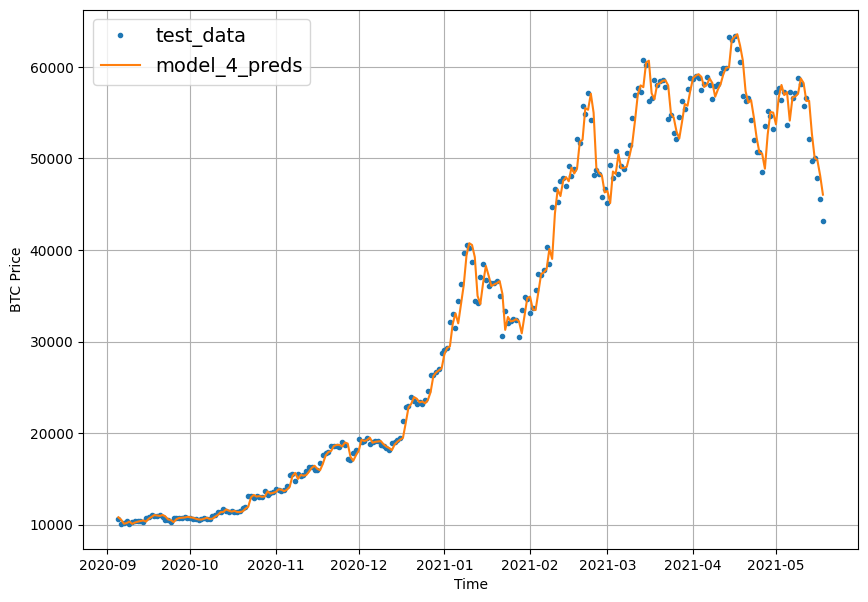

In [ ]:
# visualize

plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):],
                 test_horizons,
                 start=300,
                 label='test_data')
plot_time_series(x_test[-len(test_windows):],
                 model_4_preds,
                 format='-',
                 start=300,
                 label='model_4_preds')

# model_5 LSTM same as model_4


In [ ]:
model_5  = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(128,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_5.fit(train_windows,
            train_horizons,
            epochs=100,
            validation_data=(test_windows,test_horizons),
            callbacks=[create_model_checkpoint(model_name='model_5')])

Epoch 1/100
70/70 [==============================] - ETA: 0s - loss: 1114.0928 - mae: 1114.0928 - mse: 5688227.5000
Epoch 1: val_loss improved from inf to 1167.85535, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_5
70/70 [==============================] - 4s 17ms/step - loss: 1114.0928 - mae: 1114.0928 - mse: 5688227.5000 - val_loss: 1167.8553 - val_mae: 1167.8553 - val_mse: 4477850.0000
Epoch 2/100
70/70 [==============================] - ETA: 0s - loss: 203.7744 - mae: 203.7744 - mse: 210119.6250
Epoch 2: val_loss improved from 1167.85535 to 1092.70898, saving model to BTC_model_checkpoints/checkpoint.ckpt/model_5
70/70 [==============================] - 1s 16ms/step - loss: 203.7744 - mae: 203.7744 - mse: 210119.6250 - val_loss: 1092.7090 - val_mae: 1092.7090 - val_mse: 3826897.2500
Epoch 3/100
69/70 [============================>.] - ETA: 0s - loss: 188.8705 - mae: 188.8705 - mse: 186614.5469
Epoch 3: val_loss improved from 1092.70898 to 1071.88879, saving model to BT

In [ ]:
model_5.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 4ms/step - loss: 660.5910 - mae: 660.5910 - mse: 1373237.8750


[660.5910034179688, 660.5910034179688, 1373237.875]

In [ ]:
model_5.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_5')


In [ ]:
model_5.evaluate(test_windows,test_horizons)

18/18 [==============================] - 0s 5ms/step - loss: 563.8094 - mae: 563.8094 - mse: 1155648.8750


[563.8094482421875, 563.8094482421875, 1155648.875]

In [ ]:
model_5_preds = model_5.predict(test_windows)
model_5_preds = tf.squeeze(model_5_preds).numpy()
model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


array([8857.064, 8783.097, 9044.47 , 8784.234, 8736.338, 8738.694,
       8695.972, 8513.763, 8467.241, 8533.697], dtype=float32)

In [ ]:
model_5_score = evaluate_preds(tf.squeeze(test_horizons),model_5_preds)
model_5_score

{'mae': 563.80945,
 'mse': 1155648.8,
 'rmse': 1075.011,
 'mape': 2.5111594,
 'mase': 0.990456954088914}

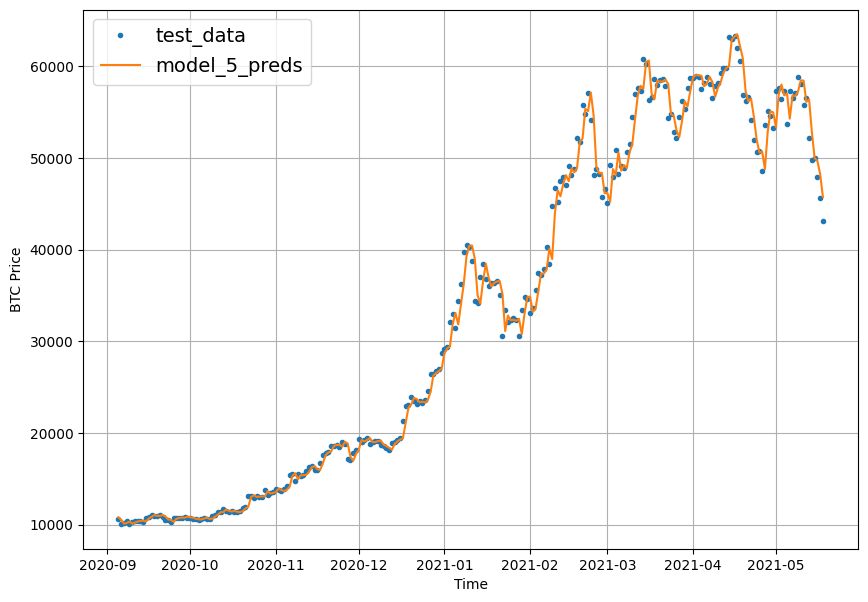

In [ ]:
# visulaize
plt.figure(figsize=(10,7))
plot_time_series(x_test[-len(test_windows):],
                 test_horizons,
                 start=300,
                 label='test_data')
plot_time_series(x_test[-len(test_windows):],
                 model_5_preds,
                 format='-',
                 start=300,
                 label='model_5_preds')

In [ ]:
df

,window,horizon
0,"[123.65499, 125.455, 108.58483, 118.67466, 121...",124.049000
1,"[125.455, 108.58483, 118.67466, 121.33866, 120...",125.961160
2,"[108.58483, 118.67466, 121.33866, 120.65533, 1...",125.279660
3,"[118.67466, 121.33866, 120.65533, 121.795, 123...",125.927500
4,"[121.33866, 120.65533, 121.795, 123.033, 124.0...",126.383330
...,...,...
2774,"[57252.7021845011, 56583.8498791665, 57107.120...",49764.132082
2775,"[56583.8498791665, 57107.1206718864, 58788.209...",50032.693137
2776,"[57107.1206718864, 58788.2096789273, 58102.191...",47885.625255
2777,"[58788.2096789273, 58102.1914262342, 55715.546...",45604.615754


In [ ]:
df = pd.DataFrame({'date'  : date,
                   'prices' : prices})
df.head()

,date,prices
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [ ]:
df['date'][0].strftime('%Y-%m-%d').split('-')[0]

'2013'

In [ ]:
df['date'][0] < df['date'][1]

True

In [ ]:
block_reward_2_datetime = np.datetime64('2012-11-28') #25
block_reward_3_datetime = np.datetime64('2016-07-09') #12.5
block_reward_4_datetime = np.datetime64('2020-05-18') #6.25

In [ ]:
def fill(x):
  if x < block_reward_3_datetime:
    return 25
  elif x < block_reward_4_datetime:
    return 12.5
  else:
    return 6.25


In [ ]:
df['halving'] = df['date'].apply(lambda x: fill(x))
df.head()

,date,prices,halving
0,2013-10-01,123.65499,25.0
1,2013-10-02,125.45500,25.0
2,2013-10-03,108.58483,25.0
3,2013-10-04,118.67466,25.0
4,2013-10-05,121.33866,25.0


In [ ]:
df['halving'].value_counts()

halving
12.50    1409
25.00    1012
6.25      366
Name: count, dtype: int64

In [ ]:
type(df['prices'][0])

numpy.float64

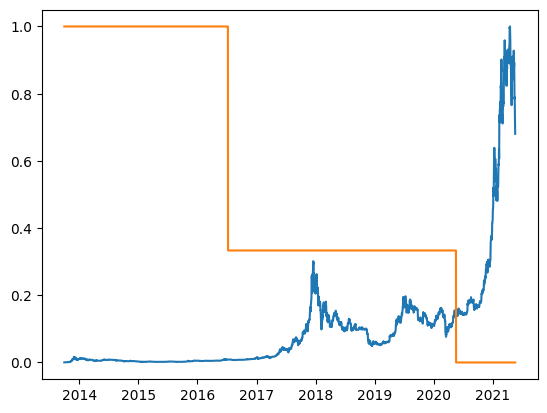

In [ ]:
from sklearn.preprocessing import minmax_scale

dff = pd.DataFrame(minmax_scale([['pdfrices','halving']]),
                                columns=df.columns,
                                index=df.index)

plt.plot(dff)
plt.xl


# new way to prepare our data
* by '''shift'''

In [68]:
WINDOW_SIZE = 7
HORIZON = 1

for i in range(WINDOW_SIZE):
  df[f'price_{i+1}'] = df['prices'].shift(periods=i+1)
df.head()

,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,
2013-10-08,123.03300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-09,124.04900,123.03300,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-10,125.96116,124.04900,123.03300,NaN,NaN,NaN,NaN,NaN
2013-10-11,125.27966,125.96116,124.04900,123.033,NaN,NaN,NaN,NaN
2013-10-12,125.92750,125.27966,125.96116,124.049,123.033,NaN,NaN,NaN


In [69]:
df.dropna(inplace=True)

In [70]:
df.head(10)

,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,
2013-10-15,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300
2013-10-16,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900
2013-10-17,137.92333,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116
2013-10-18,142.95166,137.92333,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966
2013-10-19,152.55183,142.95166,137.92333,142.76333,133.20333,135.24199,126.38333,125.92750
2013-10-20,160.33883,152.55183,142.95166,137.92333,142.76333,133.20333,135.24199,126.38333
2013-10-21,164.31499,160.33883,152.55183,142.95166,137.92333,142.76333,133.20333,135.24199
2013-10-22,177.63333,164.31499,160.33883,152.55183,142.95166,137.92333,142.76333,133.20333
2013-10-23,188.29716,177.63333,164.31499,160.33883,152.55183,142.95166,137.92333,142.76333


In [71]:
df.rename(columns={'halving':'rewards'},inplace=True)

In [72]:
x = df.drop('prices',axis=1).astype(np.float32)
y = df['prices'].astype(np.float32)

In [73]:
x

,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,
2013-10-15,135.241989,126.383331,125.927498,125.279663,125.961159,124.049004,123.032997
2013-10-16,133.203323,135.241989,126.383331,125.927498,125.279663,125.961159,124.049004
2013-10-17,142.763336,133.203323,135.241989,126.383331,125.927498,125.279663,125.961159
2013-10-18,137.923325,142.763336,133.203323,135.241989,126.383331,125.927498,125.279663
2013-10-19,142.951660,137.923325,142.763336,133.203323,135.241989,126.383331,125.927498
...,...,...,...,...,...,...,...
2021-05-14,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094,56583.851562
2021-05-15,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938,57107.121094
2021-05-16,50032.691406,49764.132812,52147.820312,56573.554688,55715.546875,58102.191406,58788.210938


In [74]:
y


date
2013-10-15      133.203323
2013-10-16      142.763336
2013-10-17      137.923325
2013-10-18      142.951660
2013-10-19      152.551834
                  ...     
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: prices, Length: 2773, dtype: float32

In [75]:
split_size

555

In [95]:
x_train = x[:-split_size]
x_test = x[-split_size:]
y_train = y[:-split_size]
y_test = y[-split_size:]

In [96]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,

((2218, 7), (555, 7), (2218,), (555,))

In [ ]:
x_train[0]

array([ 25.     , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
       125.455  , 123.65499], dtype=float32)

# model_6 Desnse model with reward extra feature

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_6.fit(x_train,
            y_train,
            epochs=100,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name='model_6')])

Epoch 1/100
70/70 [==============================] - 3s 12ms/step - loss: 327.4780 - mae: 327.4780 - mse: 621558.2500 - val_loss: 982.8646 - val_mae: 982.8646 - val_mse: 3225902.2500
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 170.3212 - mae: 170.3212 - mse: 149752.7812 - val_loss: 961.3462 - val_mae: 961.3462 - val_mse: 2735354.7500
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 157.5539 - mae: 157.5539 - mse: 131038.2344 - val_loss: 816.7095 - val_mae: 816.7095 - val_mse: 2261476.2500
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 148.4833 - mae: 148.4833 - mse: 115949.7578 - val_loss: 876.4457 - val_mae: 876.4457 - val_mse: 2225048.5000
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 138.6136 - mae: 138.6136 - mse: 102528.6016 - val_loss: 715.0629 - val_mae: 715.0629 - val_mse: 1726492.5000
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 139.8737 - mae: 

In [ ]:
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 664.5814 - mae: 664.5814 - mse: 1386368.1250


[664.5814208984375, 664.5814208984375, 1386368.125]

In [ ]:
model_6.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_6')

In [ ]:
model_6.evaluate(x_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 562.7823 - mae: 562.7823 - mse: 1138221.3750


[562.7823486328125, 562.7823486328125, 1138221.375]

In [ ]:
model_6_preds = model_6.predict(x_test)
model_6_preds = tf.squeeze(model_6_preds).numpy()
model_6_preds[:10]

18/18 [==============================] - 0s 3ms/step


array([8778.006, 9060.65 , 8777.537, 8739.98 , 8722.729, 8687.914,
       8528.595, 8444.064, 8543.486, 8243.191], dtype=float32)

In [ ]:
model_6_score = evaluate_preds(y_test,model_6_preds)
model_6_score


{'mae': 562.7824,
 'mse': 1138221.6,
 'rmse': 1066.8748,
 'mape': 2.5114663,
 'mase': 0.9877566}

In [ ]:
model_6_adjust = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model_6_adjust.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
model_6_adjust.fit(x_train,
            y_train,
            epochs=200,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name='model_9')])

Epoch 1/200
70/70 [==============================] - 5s 33ms/step - loss: 400.0601 - mae: 400.0601 - mse: 1039639.5625 - val_loss: 932.7777 - val_mae: 932.7777 - val_mse: 2795921.7500
Epoch 2/200
70/70 [==============================] - 1s 10ms/step - loss: 182.2776 - mae: 182.2776 - mse: 142906.5312 - val_loss: 1278.2759 - val_mae: 1278.2759 - val_mse: 3874808.2500
Epoch 3/200
70/70 [==============================] - 1s 9ms/step - loss: 159.8820 - mae: 159.8820 - mse: 121120.3750 - val_loss: 776.0092 - val_mae: 776.0092 - val_mse: 1758115.5000
Epoch 4/200
70/70 [==============================] - 1s 8ms/step - loss: 159.7341 - mae: 159.7341 - mse: 122526.0547 - val_loss: 1108.2468 - val_mae: 1108.2468 - val_mse: 2932455.7500
Epoch 5/200
70/70 [==============================] - 1s 8ms/step - loss: 151.6923 - mae: 151.6923 - mse: 111062.8047 - val_loss: 715.6312 - val_mae: 715.6312 - val_mse: 1546967.0000
Epoch 6/200
70/70 [==============================] - 1s 8ms/step - loss: 136.2668 -

In [ ]:
model_6_adjust.evaluate(x_test,y_test)


18/18 [==============================] - 0s 4ms/step - loss: 849.2570 - mae: 849.2570 - mse: 1902382.8750


[849.2569580078125, 849.2569580078125, 1902382.875]

In [ ]:
model_6_adjust.load_weights('BTC_model_checkpoints/checkpoint.ckpt/model_9')

In [ ]:
model_6_adjust.evaluate(x_test,y_test)

18/18 [==============================] - 0s 8ms/step - loss: 564.5647 - mae: 564.5647 - mse: 1152898.2500


[564.564697265625, 564.564697265625, 1152898.25]

In [ ]:
model_6_adjust_preds = model_6_adjust.predict(x_test)
model_6_adjust_preds = tf.squeeze(model_6_adjust_preds).numpy()
model_6_adjust_preds[:10]

18/18 [==============================] - 0s 5ms/step


array([8779.22 , 9045.835, 8783.589, 8748.872, 8744.747, 8688.174,
       8527.798, 8462.406, 8537.36 , 8256.275], dtype=float32)

In [ ]:
model_6_adjust_score = evaluate_preds(model_6_adjust_preds,y_test)
model_6_adjust_score

{'mae': 564.5647,
 'mse': 1152898.5,
 'rmse': 1073.7311,
 'mape': 2.521431,
 'mase': 1.1040499}

 # model_7 N-Beast link:https://arxiv.org/pdf/1905.10437



In [ ]:
class NBeast(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               n_neurons:int,
               n_layers:int,
               horizon:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.horizon = horizon

    self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]

    self.theta_layer = tf.keras.layers.Dense(theta_size,activation='linear')

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast,forecast = theta[:,:self.input_size],theta[:,-self.horizon]
    return backcast,forecast



In [ ]:
nbeast_layer = NBeast(input_size=7,
                    theta_size=8,
                    n_neurons=128,
                    n_layers=3,
                    horizon=1)
input_layer = tf.expand_dims(tf.range(7)+1 ,axis=0)
backcast,forecast = nbeast_layer(input_layer)
backcast,forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-1.2515036 ,  0.17886646,  0.09219071,  0.7633271 , -0.9816206 ,
         -0.46162307, -0.64683604]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6253836], dtype=float32)>)

# prepare data for NBeast

In [5]:
df.head()

,window,horizon
0,"[123.65499, 125.455, 108.58483, 118.67466, 121...",124.04900
1,"[125.455, 108.58483, 118.67466, 121.33866, 120...",125.96116
2,"[108.58483, 118.67466, 121.33866, 120.65533, 1...",125.27966
3,"[118.67466, 121.33866, 120.65533, 121.795, 123...",125.92750
4,"[121.33866, 120.65533, 121.795, 123.033, 124.0...",126.38333


In [6]:
df = pd.DataFrame({'date'  : date,
                   'prices' : prices})
df.head()

,date,prices
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [7]:
for i in range (7):
  df[f'price_{i+1}'] = df['prices'].shift(periods=i+1)
df.head()

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
0,2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
3,2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
4,2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.head(10)

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
7,2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
8,2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
9,2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
10,2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
11,2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866
12,2013-10-13,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533
13,2013-10-14,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500
14,2013-10-15,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900,123.03300
15,2013-10-16,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116,124.04900
16,2013-10-17,137.92333,142.76333,133.20333,135.24199,126.38333,125.92750,125.27966,125.96116


In [10]:
df.index = df['date']
df.head()

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,,
2013-10-08,2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [11]:
df.drop('date',axis=1,inplace=True)
df.head()

,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [12]:
x = df.drop('prices',axis=1).astype(np.float32)
y = df['prices'].astype(np.float32)

In [13]:
# create train test data
split_size = int(0.2 * len(windows))
x_train = x[:-split_size]
x_test = x[-split_size:]
y_train = y[:-split_size]
y_test = y[-split_size:]


In [14]:
len(x_train),len(x_test),len(y_train),len(y_test)

(2225, 555, 2225, 555)

In [15]:
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(1024).prefetch(tf.data.AUTOTUNE)

x_test = tf.data.Dataset.from_tensor_slices(x_test)
x_test = x_test.batch(1024).prefetch(tf.data.AUTOTUNE)

y_train = tf.data.Dataset.from_tensor_slices(y_train)
y_train = y_train.batch(1024).prefetch(tf.data.AUTOTUNE)

y_test = tf.data.Dataset.from_tensor_slices(y_test)
y_test = y_test.batch(1024).prefetch(tf.data.AUTOTUNE)



train_data = tf.data.Dataset.zip((x_train,y_train))
test_data = tf.data.Dataset.zip((x_test,y_test))

In [16]:
train_data,test_data

(<_ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_ZipDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

### N-Beast hyperprams

In [ ]:
# create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10)
# create redice lr callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.1,
                                                 patience=5)

In [17]:
EPOCHS = 5000
NEURONS = 512
LAYERS = 4
HORIZON = 1
BATCH_SIZE = 1024
WindoW_SIZE = 7
THETA_SIZE = WINDOW_SIZE + HORIZON
INPUT_SIZE = WINDOW_SIZE * HORIZON
STACKS = 30

In [ ]:
EPOCHS = 5000
NEURONS = 512
LAYERS = 4
HORIZON = 1
BATCH_SIZE = 1024
WindoW_SIZE = 7
THETA_SIZE = WINDOW_SIZE + HORIZON
INPUT_SIZE = WINDOW_SIZE * HORIZON
STACKS = 30



n_beats_block_layer = NBeast(input_size=INPUT_SIZE,
                            theta_size=THETA_SIZE,
                            n_neurons=NEURONS,
                            n_layers=LAYERS,
                            horizon=HORIZON,
                            name='nbeats')

input_layer = tf.keras.layers.Input(shape=INPUT_SIZE,name='input_layer')

resdiue , forecast = n_beats_block_layer(input_layer)

for i,_ in enumerate(range(STACKS-1)):
  backcast, block_forecast = NBeast(input_size=INPUT_SIZE,
                            theta_size=THETA_SIZE,
                            n_neurons=NEURONS,
                            n_layers=LAYERS,
                            horizon=HORIZON,
                            name=f'nbeats{i}')(resdiue)

  resdiue  = tf.keras.layers.subtract([resdiue,backcast])
  forecast = tf.keras.layers.add([forecast,block_forecast])

nbeats_model = tf.keras.Model(input_layer,forecast)

nbeats_model.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['mae','mse'])


In [ ]:
nbeats_model.fit(train_data,
                epochs=EPOCHS,
                validation_data=test_data,
                callbacks=[early_stopping,
                           reduce_lr,
                           create_model_checkpoint(model_name='model_6')
                           ])

Epoch 1/5000


### Model_8 ensemble model

In [3]:
# create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=200)
# create redice lr callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.1,
                                                 patience=100)

In [18]:
def create_ensemble_model(windwo= 7,
                          horizon=1,
                          train_data =train_data,
                          test_data=test_data,
                          loss_fns=['mae','mse','mape'],
                          num_iter = 30):
  ensemble_model = []
  for i in range(2):

    for loss in loss_fns:
      print(f'creating model {i+1}  with loss:{loss}')

      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(1,activation='linear')])
      model.compile(loss=loss,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
      model.fit(train_data,
                epochs=EPOCHS,
                validation_data=test_data,
                callbacks=[early_stopping,
                          reduce_lr])
      ensemble_model.append(model)
  return ensemble_model


In [19]:
ensemble_models = create_ensemble_model()

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 25ms/step - loss: 103.5525 - mae: 103.5525 - mse: 65432.6562 - val_loss: 580.4444 - val_mae: 580.4444 - val_mse: 1202953.0000 - lr: 1.0000e-04
Epoch 409/5000
3/3 [==============================] - 0s 21ms/step - loss: 103.5306 - mae: 103.5306 - mse: 65588.0781 - val_loss: 580.3070 - val_mae: 580.3070 - val_mse: 1203264.8750 - lr: 1.0000e-04
Epoch 410/5000
3/3 [==============================] - 0s 17ms/step - loss: 103.5227 - mae: 103.5227 - mse: 65540.5703 - val_loss: 580.5005 - val_mae: 580.5005 - val_mse: 1202696.5000 - lr: 1.0000e-04
Epoch 411/5000
3/3 [==============================] - 0s 25ms/step - loss: 103.5143 - mae: 103.5143 - mse: 65443.3359 - val_loss: 580.6356 - val_mae: 580.6356 - val_mse: 1202574.0000 - lr: 1.0000e-04
Epoch 412/5000
3/3 [==============================] - 0s 21ms/step - loss: 103.4976 - mae: 103.4976 - mse: 65429.2773 - val_loss: 580.5471 - val_mae: 580.5471 - val

In [20]:
ensemble_models

In [21]:
def ensemble_preds(model,data):
  preds = [model.predict(data) for model in ensemble_models]
  return tf.constant(tf.squeeze(preds))

In [22]:
ensemble_preds_score = ensemble_preds(ensemble_models,test_data)
ensemble_preds_score

1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 100ms/step


<tf.Tensor: shape=(6, 555), dtype=float32, numpy=
array([[ 8853.398,  9095.346,  8724.234, ..., 49540.59 , 48569.46 ,
        45546.48 ],
       [ 8779.911,  9035.953,  8686.875, ..., 49814.16 , 48489.76 ,
        46849.684],
       [ 8771.203,  9016.465,  8737.62 , ..., 49744.484, 48805.746,
        46245.742],
       [ 8756.889,  9114.623,  8688.085, ..., 49914.984, 48937.54 ,
        45488.8  ],
       [ 8733.88 ,  9045.731,  8672.962, ..., 49650.867, 47699.996,
        45474.535],
       [ 8789.309,  9070.829,  8751.076, ..., 49564.19 , 48422.99 ,
        45971.18 ]], dtype=float32)>

In [23]:
type(ensemble_preds_score)

tensorflow.python.framework.ops.EagerTensor

In [24]:
def evaluate_preds(y_true,y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(mape)
  return {'mae':mae.numpy(),'mse':mse.numpy(),'rmse':rmse.numpy(),'mape':mape.numpy(),'mase':mase.numpy()}


In [25]:
y = [y for x,y in test_data]
x = [x for x,y in test_data]

In [26]:

ensemble_model_mean_score = evaluate_preds(tf.squeeze(y),tf.reduce_mean(ensemble_preds_score,axis=0))
ensemble_model_mean_score

{'mae': 569.5361,
 'mse': 1151071.2,
 'rmse': 1072.8799,
 'mape': 2.586348,
 'mase': 0.9996102}

In [27]:
ensemble_model_median_score = evaluate_preds(tf.squeeze(y),np.median(ensemble_preds_score,axis=0))
ensemble_model_median_score

{'mae': 569.1072,
 'mse': 1148396.0,
 'rmse': 1071.6324,
 'mape': 2.5781064,
 'mase': 0.9988574}

In [28]:
# create upper lower function
def create_upper_lower(preds):
  std = tf.math.reduce_std(preds,axis=0)
  mean = tf.math.reduce_mean(preds,axis=0)
  itenrval = 1.96 * std

  upper,lower = mean + itenrval, mean - itenrval
  return upper,lower


In [29]:
ensemble_median = np.median(ensemble_preds_score,axis=0)
ensemble_median.shape

(555,)

In [30]:
upper,lower = create_upper_lower(ensemble_preds_score)


In [31]:
df.head()

,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [33]:
np.median(ensemble_preds_score,axis=0).shape

(555,)

In [34]:
x_test,len(x_test)

(<_PrefetchDataset element_spec=TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)>,
 1)

In [35]:
ensemble_median = tf.squeeze(np.median(ensemble_preds_score,axis=0))
ensemble_median.shape

TensorShape([555])

In [36]:
ensemble_median = np.median(ensemble_preds_score,axis=0)

In [53]:
tf.squeeze(tf.squeeze(y).numpy()).shape

TensorShape([555])

In [58]:
tf.squeeze(ensemble_median).shape

TensorShape([555])

In [65]:
df.index[-len(tf.squeeze(ensemble_median)):]

DatetimeIndex(['2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18',
               '2019-11-19', '2019-11-20',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='date', length=555, freq=None)

### visalize enemble

In [98]:
x_test.index[ofset:]


DatetimeIndex(['2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01',
               '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
               '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13',
               '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17',
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15',
               '2021-05-16', '2021-05-17', '2021-05-18'],
              dtype

In [85]:
tf.squeeze(y_test).shape

TensorShape([555])

Timestamp('2013-10-15 00:00:00')

In [94]:
tf.squeeze(y_test).numpy()[:].shape

(55,)

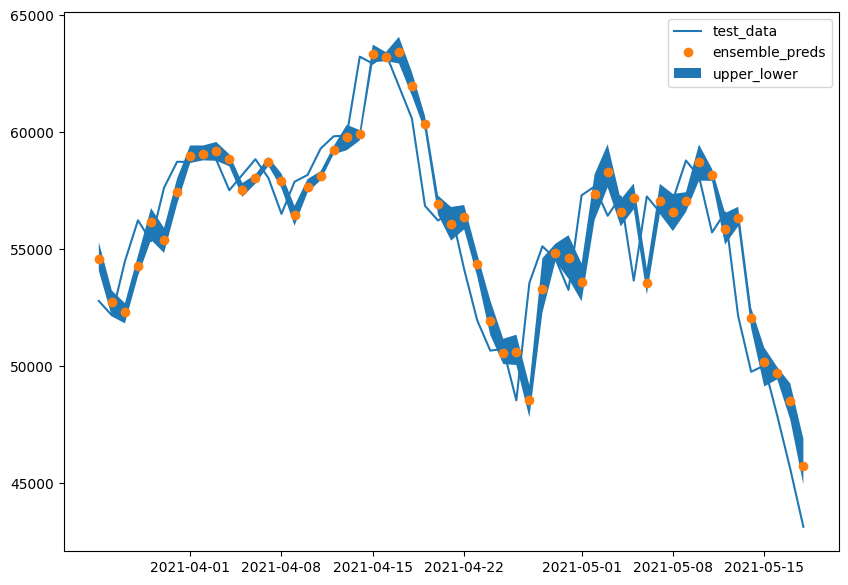

In [106]:
ofset = 500
plt.figure(figsize=(10,7))
plt.plot(x_test.index[500:],
         y_test[500:],
         label='test_data')
plt.plot(x_test.index[500:],
         tf.squeeze(ensemble_median)[500:],
         'o',
         label='ensemble_preds')
plt.fill_between(x_test.index[ofset:],
                 (lower)[ofset:],
                 (upper)[ofset:],
                 label='upper_lower')
plt.legend()

### save this model

In [109]:
import pickle

# Assuming you have a list of models

# Save the list of models to a file
with open('ensemble_models.pkl', 'wb') as file:
    pickle.dump(ensemble_models, file)


### lets see the best performing model so far to used it to predict the price of bitcoin

In [ ]:
model_scores_df = pd.DataFrame({'model_0 score':
{'mae': 566.1176,
 'mse': 1149785.4,
 'rmse': 1072.2804,
 'mape': 2.52505,
 'mase': 0.9945117698807909},

'model_1_score':
{'mae': 595.33673,
 'mse': 1203572.8,
 'rmse': 1097.0746,
 'mape': 2.722598,
 'mase': 1.039070613498857},

'model_3_score' :
{'mae': 1204.9941,
 'mse': 5075665.5,
 'rmse': 2252.9238,
 'mape': 5.4538283,
 'mase': 2.1412769117962607}
,
'model_4_score CONV1D':
{'mae': 561.7786,
 'mse': 1151999.0,
 'rmse': 1073.3121,
 'mape': 2.5123477,
 'mase': 0.9868893479373553}
,
'model_5_score LSTM':
{'mae': 563.80945,
 'mse': 1155648.8,
 'rmse': 1075.011,
 'mape': 2.5111594,
 'mase': 0.990456954088914}
,
'model_6_score  Dense with extra reward column_or_1d':
 {'mae': 562.7824,
 'mse': 1138221.6,
 'rmse': 1066.8748,
 'mape': 2.5114663,
 'mase': 0.9877566}

,
'model_6_with extra layers and hidden Unit':
{'mae': 564.5647,
 'mse': 1152898.5,
 'rmse': 1073.7311,
 'mape': 2.521431,
 'mase': 1.1040499}
,
'model_8_ensemble_model_score':
{'mae': 566.55145,
 'mse': 1138281.1,
 'rmse': 1066.9026,
 'mape': 2.5674744,
 'mase': 0.9943718}})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = model_scores_df.T
df

,mae,mse,rmse,mape,mase
model_0 score,566.11760,1149785.4,1072.2804,2.525050,0.994512
model_1_score,595.33673,1203572.8,1097.0746,2.722598,1.039071
model_3_score,1204.99410,5075665.5,2252.9238,5.453828,2.141277
model_4_score CONV1D,561.77860,1151999.0,1073.3121,2.512348,0.986889
model_5_score LSTM,563.80945,1155648.8,1075.0110,2.511159,0.990457
model_6_score Dense with extra reward column_or_1d,562.78240,1138221.6,1066.8748,2.511466,0.987757
model_6_with extra layers and hidden Unit,564.56470,1152898.5,1073.7311,2.521431,1.104050
model_8_ensemble_model_score,566.55145,1138281.1,1066.9026,2.567474,0.994372


In [ ]:
df['mae'].min()

561.7786

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_2 = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_2

,mae,mse,rmse,mape,mase
0,0.006746,0.002937,0.004558,0.004720,0.006603
1,0.052172,0.016597,0.025463,0.071853,0.045203
2,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.003499,0.005428,0.000404,0.000000
4,0.003157,0.004426,0.006860,0.000000,0.003090
5,0.001561,0.000000,0.000000,0.000104,0.000751
6,0.004332,0.003728,0.005781,0.003491,0.101492
7,0.007420,0.000015,0.000023,0.019137,0.006482


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'model_0 score'),
  Text(1, 0, 'model_1_score'),
  Text(2, 0, 'model_3_score'),
  Text(3, 0, 'model_4_score CONV1D'),
  Text(4, 0, 'model_5_score LSTM'),
  Text(5, 0, 'model_6_score  Dense with extra reward column_or_1d'),
  Text(6, 0, 'model_6_with extra layers and hidden Unit'),
  Text(7, 0, 'model_8_ensemble_model_score')])

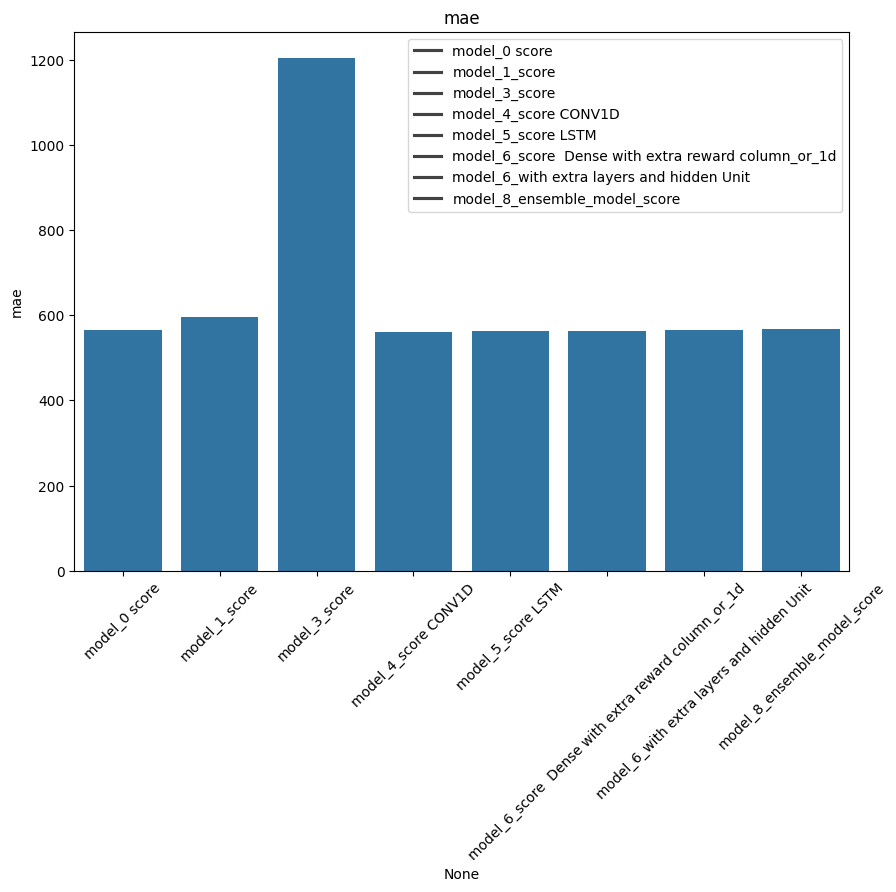

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x=df.index,y=df['mae'])
plt.legend(df.index)
plt.title('mae')
plt.xticks(rotation=45)


In [ ]:
model_scores_df

,model_0 score,model_1_score,model_3_score,model_4_score CONV1D,model_5_score LSTM,model_6_score Dense with extra reward column_or_1d,model_6_with extra layers and hidden Unit,model_8_ensemble_model_score
mae,5.661176e+02,5.953367e+02,1.204994e+03,5.617786e+02,5.638094e+02,5.627824e+02,5.645647e+02,5.665515e+02
mse,1.149785e+06,1.203573e+06,5.075666e+06,1.151999e+06,1.155649e+06,1.138222e+06,1.152898e+06,1.138281e+06
rmse,1.072280e+03,1.097075e+03,2.252924e+03,1.073312e+03,1.075011e+03,1.066875e+03,1.073731e+03,1.066903e+03
mape,2.525050e+00,2.722598e+00,5.453828e+00,2.512348e+00,2.511159e+00,2.511466e+00,2.521431e+00,2.567474e+00
mase,9.945118e-01,1.039071e+00,2.141277e+00,9.868893e-01,9.904570e-01,9.877566e-01,1.104050e+00,9.943718e-01


In [ ]:
# prompt: Using dataframe model_scores_df: grouped bar plot

import altair as alt
model_scores_df_melted = model_scores_df.melt(var_name='Model', value_name='Score')
alt.Chart(model_scores_df_melted).mark_bar().encode(
    x='Model',
    y='Score',
    color='Model'
)


In [ ]:
model_scores_df[model_scores_df.index=='mae']

,model_0 score,model_1_score,model_3_score,model_4_score CONV1D,model_5_score LSTM,model_6_score Dense with extra reward column_or_1d,model_6_with extra layers and hidden Unit,model_8_ensemble_model_score
mae,566.1176,595.33673,1204.9941,561.7786,563.80945,562.7824,564.5647,566.55145


TypeError: only length-1 arrays can be converted to Python scalars

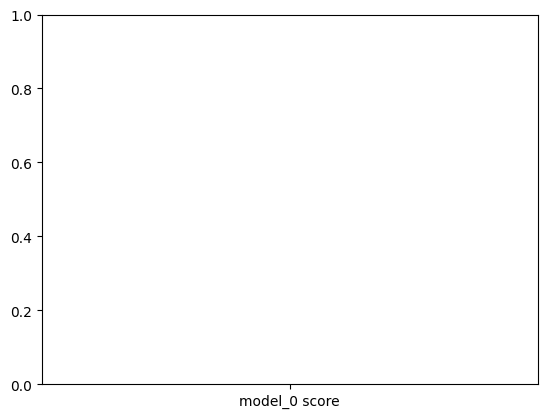

In [ ]:
plt.bar(x=model_scores_df.columns,y=model_scores_df[model_scores_df.index=='mae'],height=model_scores_df[model_scores_df.index=='mae'])

In [ ]:
plt

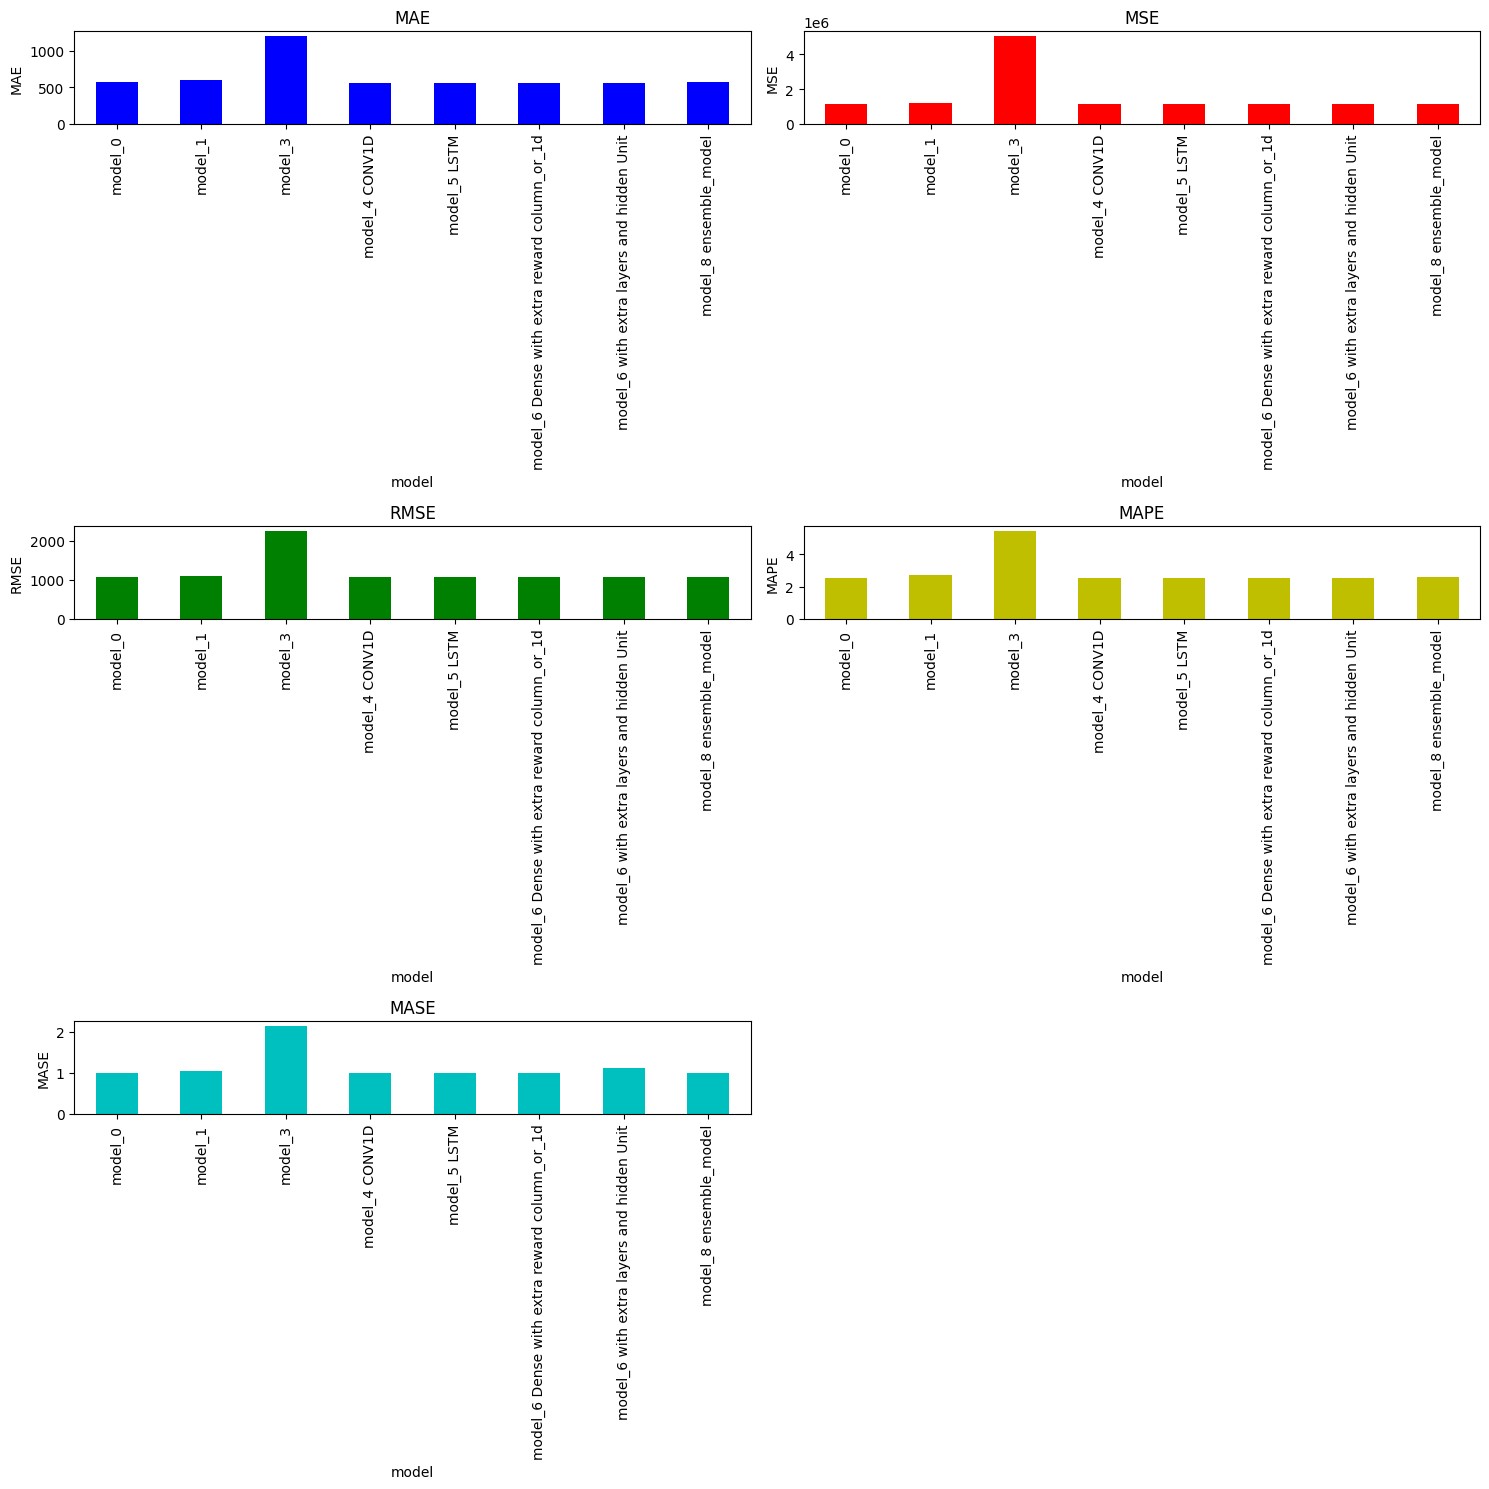

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'model': [
        'model_0', 'model_1', 'model_3', 'model_4 CONV1D', 'model_5 LSTM',
        'model_6 Dense with extra reward column_or_1d',
        'model_6 with extra layers and hidden Unit', 'model_8 ensemble_model'
    ],
    'mae': [
        5.661176e+02, 5.953367e+02, 1.204994e+03, 5.617786e+02,
        5.638094e+02, 5.627824e+02, 5.645647e+02, 5.665515e+02
    ],
    'mse': [
        1.149785e+06, 1.203573e+06, 5.075666e+06, 1.151999e+06,
        1.155649e+06, 1.138222e+06, 1.152898e+06, 1.138281e+06
    ],
    'rmse': [
        1.072280e+03, 1.097075e+03, 2.252924e+03, 1.073312e+03,
        1.075011e+03, 1.066875e+03, 1.073731e+03, 1.066903e+03
    ],
    'mape': [
        2.525050e+00, 2.722598e+00, 5.453828e+00, 2.512348e+00,
        2.511159e+00, 2.511466e+00, 2.521431e+00, 2.567474e+00
    ],
    'mase': [
        9.945118e-01, 1.039071e+00, 2.141277e+00, 9.868893e-01,
        9.904570e-01, 9.877566e-01, 1.104050e+00, 9.943718e-01
    ]
}

df = pd.DataFrame(data)

# Plotting the metrics
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# MAE
df.plot(kind='bar', x='model', y='mae', ax=axes[0, 0], legend=False, color='b')
axes[0, 0].set_title('MAE')
axes[0, 0].set_ylabel('MAE')

# MSE
df.plot(kind='bar', x='model', y='mse', ax=axes[0, 1], legend=False, color='r')
axes[0, 1].set_title('MSE')
axes[0, 1].set_ylabel('MSE')

# RMSE
df.plot(kind='bar', x='model', y='rmse', ax=axes[1, 0], legend=False, color='g')
axes[1, 0].set_title('RMSE')
axes[1, 0].set_ylabel('RMSE')

# MAPE
df.plot(kind='bar', x='model', y='mape', ax=axes[1, 1], legend=False, color='y')
axes[1, 1].set_title('MAPE')
axes[1, 1].set_ylabel('MAPE')

# MASE
df.plot(kind='bar', x='model', y='mase', ax=axes[2, 0], legend=False, color='c')
axes[2, 0].set_title('MASE')
axes[2, 0].set_ylabel('MASE')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


### now we build amoel and train it on all data we have tp opredict the future price of bitcoin

In [ ]:
bitcoin_df = pd.DataFrame({'date'  : date,
                   'prices' : prices})

In [ ]:
bitcoin_df.head()

,date,prices
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [ ]:
for i in range (7):
  bitcoin_df[f'price_{i+1}'] = bitcoin_df['prices'].shift(periods=i+1)
bitcoin_df.head()

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
0,2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
3,2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
4,2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_df.dropna(inplace=True)

In [ ]:
bitcoin_df.head()

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
7,2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
8,2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
9,2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
10,2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
11,2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
bitcoin_df.index = bitcoin_df['date']
bitcoin_df.head()

,date,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,,
2013-10-08,2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
bitcoin_df.drop('date',axis=1,inplace=True)
bitcoin_df.head()

,prices,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
x = bitcoin_df.drop('prices',axis=1)
y = bitcoin_df['prices']

In [ ]:
x.head()

,price_1,price_2,price_3,price_4,price_5,price_6,price_7
date,,,,,,,
2013-10-08,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
y.head()

date
2013-10-08    123.03300
2013-10-09    124.04900
2013-10-10    125.96116
2013-10-11    125.27966
2013-10-12    125.92750
Name: prices, dtype: float64

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(x)
train_labels = tf.data.Dataset.from_tensor_slices(y)
bitcoin_data = tf.data.Dataset.zip((train_data,train_labels))

In [ ]:
bitcoin_data = bitcoin_data.batch(1024).prefetch(tf.data.AUTOTUNE)

In [ ]:
# create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=10)
# create redice lr callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                 factor=0.1,
                                                 patience=5)

In [ ]:
# build our model

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),\
    tf.keras.layers.Dense(1,activation='linear')])

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

model_9.fit(bitcoin_data,
            epochs=5000,
            callbacks=[early_stopping,
                       reduce_lr])


Epoch 1/5000
3/3 [==============================] - 1s 9ms/step - loss: 1471.5247 - mae: 1471.5247 - mse: 6679123.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 8ms/step - loss: 3693.4697 - mae: 3693.4702 - mse: 58896372.0000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 9ms/step - loss: 763.6207 - mae: 763.6206 - mse: 2008544.3750 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 0s 10ms/step - loss: 1006.1890 - mae: 1006.1890 - mse: 4506667.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 0s 11ms/step - loss: 1991.7173 - mae: 1991.7173 - mse: 19031162.0000 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 8ms/step - loss: 629.9724 - mae: 629.9725 - mse: 1638500.3750 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 9ms/step - loss: 2203.0652 - mae: 2203.0652 - mse: 21473428.0000 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 9ms/step - loss: 696

### create a function to predict the future price of bitcoin

In [ ]:
def predict_price(model,values,into_future,window_size=7):

  forecast_preds = []
  last_window = values[-window_size:]

  for i in range(into_future):
    preds = model.predict(tf.expand_dims(last_window,axis=0))
    print(f'predicting window : {last_window} and preds is ------>{preds}')
    forecast_preds.append(tf.squeeze(preds).numpy())

    # Update last_window correctly to maintain shape
    last_window = np.append(last_window[1:],preds)  # Slide the window forward
  return forecast_preds

In [ ]:
y = y.values
y,y.shape

(array([  123.033     ,   124.049     ,   125.96116   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]),
 (2780,))

In [ ]:
y[-7:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
forecast_preds = predict_price(model_9,y,14)
forecast_preds


1/1 [==============================] - 0s 21ms/step
predicting window : [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] and preds is ------>[[56777.703]]
1/1 [==============================] - 0s 21ms/step
predicting window : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56777.703125  ] and preds is ------>[[46859.645]]
1/1 [==============================] - 0s 21ms/step
predicting window : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56777.703125   46859.64453125] and preds is ------>[[51825.508]]
1/1 [==============================] - 0s 23ms/step
predicting window : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56777.703125   46859.64453125 51825.5078125 ] and preds is ------>[[49235.9]]
1/1 [==============================] - 0s 20ms/step
predicting window : [47885.62525472 45604.61575361 43144.47129086 56777.703125
 46859.64453125

[56777.703,
 46859.645,
 51825.508,
 49235.9,
 47278.707,
 48666.58,
 42598.207,
 57094.074,
 41623.57,
 54348.887,
 45240.152,
 46434.137,
 49494.71,
 41414.484]

lets visualize our preds

In [ ]:
df = pd.DataFrame({'price' : prices,
                   'date' : date})
df.head()


,price,date
0,123.65499,2013-10-01
1,125.45500,2013-10-02
2,108.58483,2013-10-03
3,118.67466,2013-10-04
4,121.33866,2013-10-05


In [ ]:
df.tail(10)

,price,date
2777,58788.209679,2021-05-09
2778,58102.191426,2021-05-10
2779,55715.546651,2021-05-11
2780,56573.555472,2021-05-12
2781,52147.821187,2021-05-13
2782,49764.132082,2021-05-14
2783,50032.693137,2021-05-15
2784,47885.625255,2021-05-16
2785,45604.615754,2021-05-17
2786,43144.471291,2021-05-18


In [ ]:
df['date'].iloc[-1]  + np.timedelta64(1,'D')

Timestamp('2021-05-19 00:00:00')

In [ ]:
date = df['date'].iloc[-1]
n_dates = []
for i in range(14):
  date = date + np.timedelta64(1,'D')
  n_dates.append(date)

In [ ]:
forecast_preds = [56777.703,
 46859.645,
 51825.508,
 49235.9,
 47278.707,
 48666.58,
 42598.207,
 57094.074,
 41623.57,
 54348.887,
 45240.152,
 46434.137,
 49494.71,
 41414.484]

In [ ]:
new_df = pd.DataFrame({'prices' : forecast_preds,
                       'date' : n_dates})
new_df

,prices,date
0,56777.703,2021-05-19
1,46859.645,2021-05-20
2,51825.508,2021-05-21
3,49235.900,2021-05-22
4,47278.707,2021-05-23
5,48666.580,2021-05-24
6,42598.207,2021-05-25
7,57094.074,2021-05-26
8,41623.570,2021-05-27
9,54348.887,2021-05-28


In [ ]:
df.head(),new_df.head()

(       price       date
 0  123.65499 2013-10-01
 1  125.45500 2013-10-02
 2  108.58483 2013-10-03
 3  118.67466 2013-10-04
 4  121.33866 2013-10-05,
       prices       date
 0  56777.703 2021-05-19
 1  46859.645 2021-05-20
 2  51825.508 2021-05-21
 3  49235.900 2021-05-22
 4  47278.707 2021-05-23)

In [ ]:
new_df.rename(columns={'prices':'price'},inplace=True)

In [ ]:
len(df),len(new_df)

(2787, 14)

In [ ]:
df

,price,date
0,123.654990,2013-10-01
1,125.455000,2013-10-02
2,108.584830,2013-10-03
3,118.674660,2013-10-04
4,121.338660,2013-10-05
...,...,...
2782,49764.132082,2021-05-14
2783,50032.693137,2021-05-15
2784,47885.625255,2021-05-16
2785,45604.615754,2021-05-17


In [ ]:
concat_df = pd.concat([df,new_df])
concat_df.tail(20)


,price,date
2781,52147.821187,2021-05-13
2782,49764.132082,2021-05-14
2783,50032.693137,2021-05-15
2784,47885.625255,2021-05-16
2785,45604.615754,2021-05-17
2786,43144.471291,2021-05-18
0,56777.703000,2021-05-19
1,46859.645000,2021-05-20
2,51825.508000,2021-05-21
3,49235.900000,2021-05-22


In [ ]:
forecast_preds

[56777.703,
 46859.645,
 51825.508,
 49235.9,
 47278.707,
 48666.58,
 42598.207,
 57094.074,
 41623.57,
 54348.887,
 45240.152,
 46434.137,
 49494.71,
 41414.484]

In [ ]:
concat_df.tail(20)

,price,date
2781,52147.821187,2021-06-01
2782,49764.132082,2021-06-01
2783,50032.693137,2021-06-01
2784,47885.625255,2021-06-01
2785,45604.615754,2021-06-01
2786,431.444713,2021-06-01
0,56777.703000,2021-05-19
1,46859.645000,2021-05-20
2,51825.508000,2021-05-21
3,49235.900000,2021-05-22


In [ ]:
len(concat_df)

2801

In [ ]:
concat_df

,price,date
0,123.65499,2021-06-01
1,125.45500,2021-06-01
2,108.58483,2021-06-01
3,118.67466,2021-06-01
4,121.33866,2021-06-01
...,...,...
9,54348.88700,2021-05-28
10,45240.15200,2021-05-29
11,46434.13700,2021-05-30
12,49494.71000,2021-05-31


In [ ]:
concat_df.reset_index(drop=True,inplace=True)

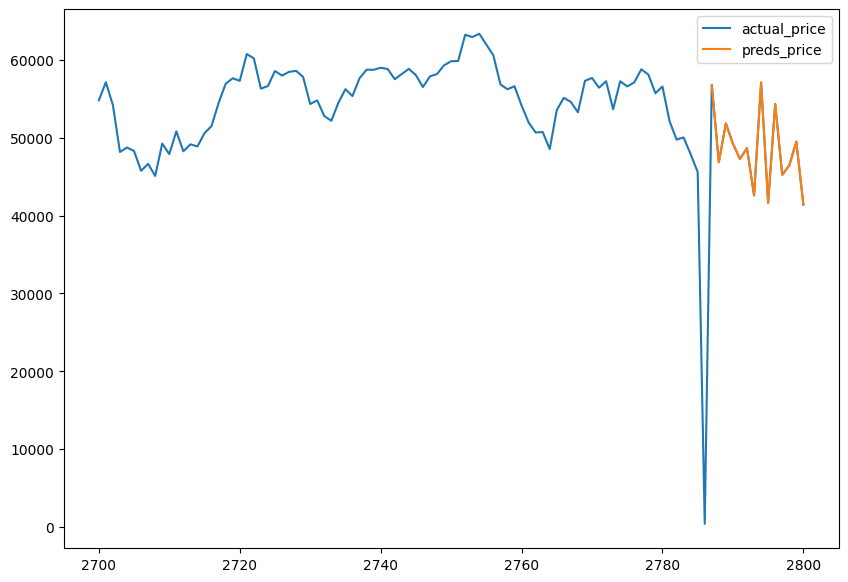

In [ ]:
# visualize our prediction
plt.figure(figsize=(10,7))
plt.plot(concat_df.index[2700:],
         concat_df['price'][2700:],
         label='actual_price')
plt.plot(concat_df.index[-14:],
         concat_df['price'][-14:],
         label='preds_price',)
plt.legend()

#### now we build a turkey_model

In [ ]:
df['price'].iloc[-1] = df['price'].iloc[-1]/100
df

<ipython-input-28-92d13f879d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'].iloc[-1] = df['price'].iloc[-1]/100


,price,date
0,123.654990,2021-06-01
1,125.455000,2021-06-01
2,108.584830,2021-06-01
3,118.674660,2021-06-01
4,121.338660,2021-06-01
...,...,...
2782,49764.132082,2021-06-01
2783,50032.693137,2021-06-01
2784,47885.625255,2021-06-01
2785,45604.615754,2021-06-01


In [ ]:
# build our turkey_model

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),\
    tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

model_10.fit(bitcoin_data,
            epochs=5000,
            callbacks=[early_stopping,
                       reduce_lr])


Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 7ms/step - loss: 239.1018 - mae: 239.1019 - mse: 395081.4062 - lr: 1.0000e-05
Epoch 155/5000
3/3 [==============================] - 0s 6ms/step - loss: 238.8813 - mae: 238.8813 - mse: 395334.4062 - lr: 1.0000e-05
Epoch 156/5000
3/3 [==============================] - 0s 7ms/step - loss: 238.8123 - mae: 238.8123 - mse: 395861.7188 - lr: 1.0000e-05
Epoch 157/5000
3/3 [==============================] - 0s 6ms/step - loss: 238.8100 - mae: 238.8100 - mse: 396172.5312 - lr: 1.0000e-05
Epoch 158/5000
3/3 [==============================] - 0s 9ms/step - loss: 238.7365 - mae: 238.7365 - mse: 395851.0938 - lr: 1.0000e-05
Epoch 159/5000
3/3 [==============================] - 0s 7ms/step - loss: 238.6191 - mae: 238.6191 - mse: 395168.7812 - lr: 1.0000e-05
Epoch 160/5000
3/3 [==============================] - 0s 7ms/step - loss: 238.5283 - mae: 238.5283 - mse: 394550.3750 - lr: 1.0000e-05
Epoch 161/5000
3/3 

In [ ]:
# lets predict with our turkey_model
forecast_preds_turkey = predict_price(model_10,y,14)
forecast_preds_turkey


1/1 [==============================] - 0s 122ms/step
predicting window : date
2021-05-12    56573.555472
2021-05-13    52147.821187
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: prices, dtype: float64 and preds is ------>[[55717.086]]
1/1 [==============================] - 0s 28ms/step
predicting window : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55717.0859375 ] and preds is ------>[[54278.27]]
1/1 [==============================] - 0s 35ms/step
predicting window : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55717.0859375  54278.26953125] and preds is ------>[[47443.12]]
1/1 [==============================] - 0s 148ms/step
predicting window : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55717.0859375  54278.26953125 47443.12109375] and preds is ------>[[52122.863]]
1/1 [========================

[55717.086,
 54278.27,
 47443.12,
 52122.863,
 48636.246,
 44186.484,
 45889.453,
 54266.555,
 56589.668,
 46205.74,
 53270.68,
 51058.527,
 42307.26,
 47359.375]

In [ ]:
new_df = pd.DataFrame({'price' : forecast_preds_turkey,
                       'date' : n_dates})
new_df

,price,date
0,55717.085938,2021-05-19
1,54278.269531,2021-05-20
2,47443.121094,2021-05-21
3,52122.863281,2021-05-22
4,48636.246094,2021-05-23
5,44186.484375,2021-05-24
6,45889.453125,2021-05-25
7,54266.554688,2021-05-26
8,56589.667969,2021-05-27
9,46205.738281,2021-05-28


In [ ]:
turkey_df = pd.concat([df,new_df]).reset_index(drop=True)
turkey_df

,price,date
0,123.654990,2021-06-01
1,125.455000,2021-06-01
2,108.584830,2021-06-01
3,118.674660,2021-06-01
4,121.338660,2021-06-01
...,...,...
2796,46205.738281,2021-05-28
2797,53270.679688,2021-05-29
2798,51058.527344,2021-05-30
2799,42307.261719,2021-05-31


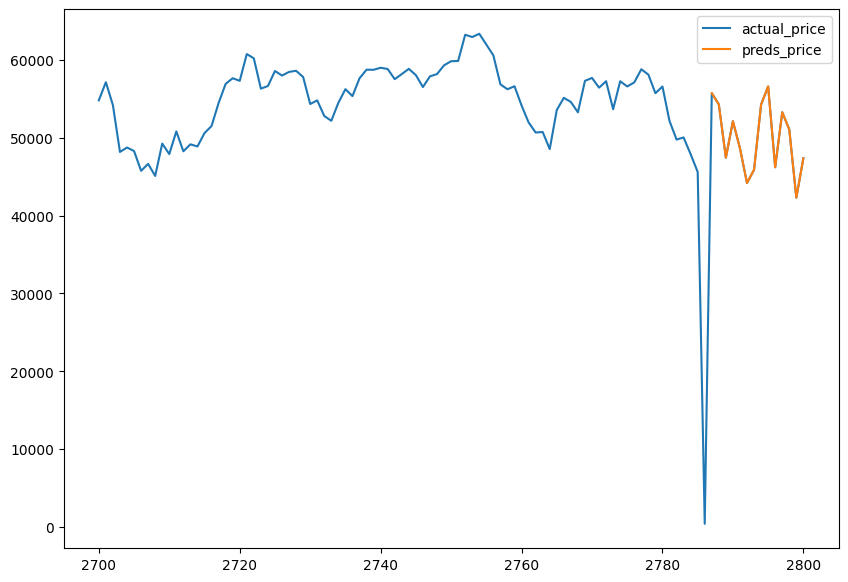

In [ ]:
# visualize our prediction
plt.figure(figsize=(10,7))
plt.plot(turkey_df.index[2700:],
         turkey_df['price'][2700:],
         label='actual_price')
plt.plot(turkey_df.index[-14:],
         turkey_df['price'][-14:],
         label='preds_price',)
plt.legend()

In [ ]:
import requests
import pandas as pd

# Function to fetch Bitcoin price data from CoinDesk API
def fetch_bitcoin_data(start_date, end_date):
    url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={start_date}&end={end_date}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['bpi']
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return {}

# Define the date range for the specific dates
start_date = "2022-05-13"
end_date = "2023-06-01"

# Fetch data
bitcoin_data = fetch_bitcoin_data(start_date, end_date)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(list(bitcoin_data.items()), columns=['date', 'price'])

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('bitcoin_data_specific_range.csv', index=False)


         date     price
0  2024-07-14  60818.13


In [ ]:
 concat_df.tail(20)

,price,date
2781,52147.821187,2021-05-13
2782,49764.132082,2021-05-14
2783,50032.693137,2021-05-15
2784,47885.625255,2021-05-16
2785,45604.615754,2021-05-17
2786,43144.471291,2021-05-18
2787,56777.703000,2021-05-19
2788,46859.645000,2021-05-20
2789,51825.508000,2021-05-21
2790,49235.900000,2021-05-22


In [ ]:
datetime.now()

datetime.datetime(2024, 7, 14, 23, 10, 38, 254245)

In [ ]:
import requests
import pandas as pd

# Function to fetch Bitcoin price data from CoinDesk API
def fetch_bitcoin_data(start_date, end_date):
    url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={start_date}&end={end_date}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['bpi']
    else:
        print("Failed to fetch data")
        return {}

# Define the date range
start_date = "2020-05-13"
end_date = "2021-06-01"

# Fetch data
bitcoin_data = fetch_bitcoin_data(start_date, end_date)

# Convert the data into a pandas DataFrame
df = pd.DataFrame(list(bitcoin_data.items()), columns=['date', 'price'])

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('bitcoin_data_specific_range.csv', index=False)


         date     price
0  2024-07-14  60818.13


In [ ]:
df

,date,price
0,2024-07-14,60818.13


In [ ]:
slice_df = concat_df[-17:]
slice_df

,price,date
2784,47885.625255,2021-05-16
2785,45604.615754,2021-05-17
2786,43144.471291,2021-05-18
2787,56777.703000,2021-05-19
2788,46859.645000,2021-05-20
2789,51825.508000,2021-05-21
2790,49235.900000,2021-05-22
2791,47278.707000,2021-05-23
2792,48666.580000,2021-05-24
2793,42598.207000,2021-05-25


In [ ]:
final_df = pd.concat([slice_df,df],axis=1)
final_df

,price,date,date,price
2784,47885.625255,2021-05-16,NaN,NaN
2785,45604.615754,2021-05-17,NaN,NaN
2786,43144.471291,2021-05-18,NaN,NaN
2787,56777.703000,2021-05-19,NaN,NaN
2788,46859.645000,2021-05-20,NaN,NaN
2789,51825.508000,2021-05-21,NaN,NaN
2790,49235.900000,2021-05-22,NaN,NaN
2791,47278.707000,2021-05-23,NaN,NaN
2792,48666.580000,2021-05-24,NaN,NaN
2793,42598.207000,2021-05-25,NaN,NaN


In [ ]:
df = pd.DataFrame({'age':[i for i in range(20)],
                  'age2' : [i for i in range(20)],
                   'age4':[i for i in range(20)],
                  'age5' : [i for i in range(20)]}).reset_index(drop=True)
df

,age,age2,age4,age5
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
5,5,5,5,5
6,6,6,6,6
7,7,7,7,7
8,8,8,8,8
9,9,9,9,9


In [ ]:
df.head()

,age,age2,age4,age5
0,0,0,0,0
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4


In [ ]:
df.iloc[:,-1:]

,age5
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9
